In [228]:
# /Users/james/code/hello-world/data/M-MEM/incident_event_log.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [229]:
warnings.filterwarnings("ignore")

NameError: name 'warnings' is not defined

In [ ]:
data = pd.read_csv('./incident_event_log.csv')
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


# 1. 数据预处理

In [ ]:
data.info


<bound method DataFrame.info of             number incident_state  active  reassignment_count  reopen_count  \
0       INC0000045            New    True                   0             0   
1       INC0000045       Resolved    True                   0             0   
2       INC0000045       Resolved    True                   0             0   
3       INC0000045         Closed   False                   0             0   
4       INC0000047            New    True                   0             0   
...            ...            ...     ...                 ...           ...   
119993  INC0029231       Resolved    True                   0             0   
119994  INC0029231         Closed   False                   0             0   
119995  INC0029232       Resolved    True                   0             0   
119996  INC0029232         Closed   False                   0             0   
119997  INC0029233            New    True                   0             0   

        sys_mod_cou

In [ ]:
data.incident_state.unique()
data[data.incident_state=='-100'].shape
data=data[data.incident_state!='-100']
data.incident_state.unique()

# There are no duplicate values
data[data.duplicated()]
len(data.number.unique())
data.number.value_counts()


number
INC0019396    58
INC0005927    46
INC0020718    45
INC0011206    44
INC0025734    43
              ..
INC0012745     2
INC0012744     2
INC0012743     2
INC0012732     2
INC0029233     1
Name: count, Length: 20769, dtype: int64

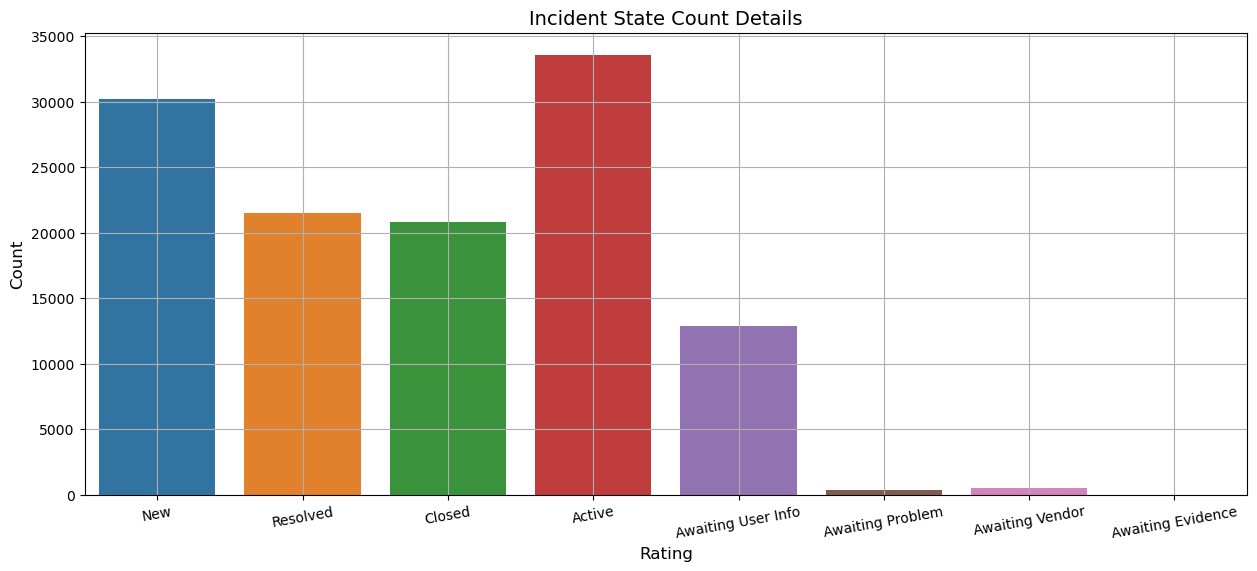

In [ ]:
# Incident State
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='incident_state', data=data, ax=ax)
plt.title("Incident State Count Details", size = 14)
plt.xlabel("Rating", size=12)
plt.ylabel("Count", size=12)
plt.xticks(rotation=10)
plt.grid()
plt.show()

/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_92071/3180456796.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(reass_cnt, shade=True, ax=ax1)
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_92071/3180456796.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(reass_cnt, shade=True, cumulative=True,ax=ax2)
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is

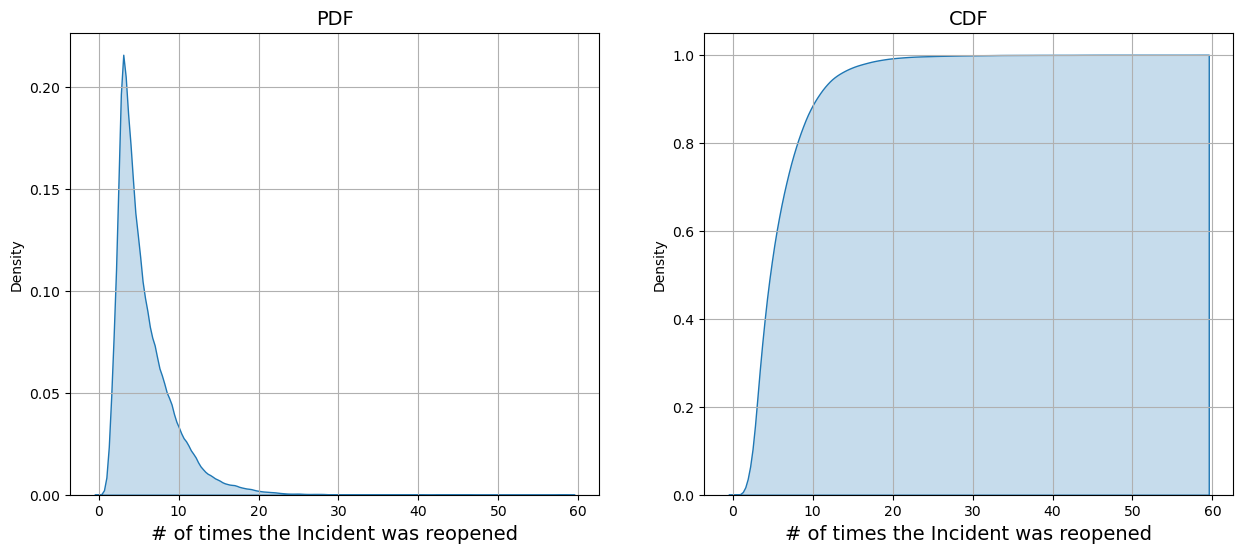

In [ ]:
# Grouping the Incidents by wrt its reopen count
reass_cnt = data.groupby(by='number')['reopen_count'].count().sort_values(ascending=False)

fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(121)
sns.kdeplot(reass_cnt, shade=True, ax=ax1)
plt.xlabel('# of times the Incident was reopened',size = 14)
plt.title("PDF",size = 14)
ax1.grid()
ax2 = plt.subplot(122)
sns.kdeplot(reass_cnt, shade=True, cumulative=True,ax=ax2)
plt.xlabel('# of times the Incident was reopened',size = 14)
plt.title('CDF',size = 14)
ax2.grid()
plt.show()

/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_92071/2454941777.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sys_mod_count_cnt, shade=True, ax=ax1)
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_92071/2454941777.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sys_mod_count_cnt, shade=True, cumulative=True,ax=ax2)
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

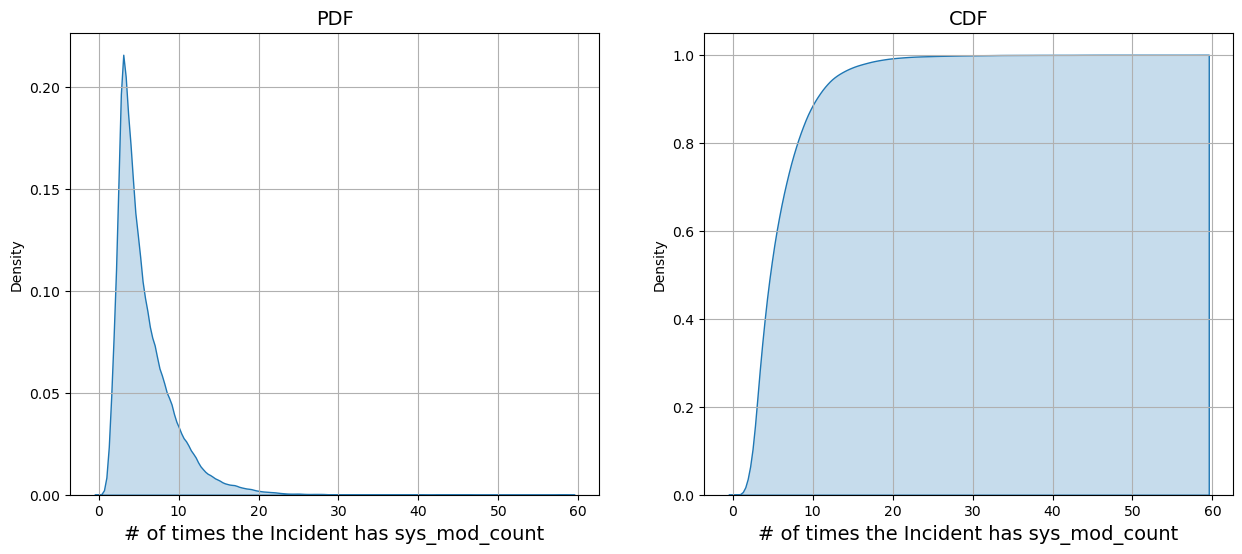

In [ ]:
# Grouping the Incidents by wrt its sys_mod_count count
sys_mod_count_cnt = data.groupby(by='number')['sys_mod_count'].count().sort_values(ascending=False)

fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(121)
sns.kdeplot(sys_mod_count_cnt, shade=True, ax=ax1)
plt.xlabel('# of times the Incident has sys_mod_count',size = 14)
plt.title("PDF",size = 14)
ax1.grid()
ax2 = plt.subplot(122)
sns.kdeplot(sys_mod_count_cnt, shade=True, cumulative=True,ax=ax2)
plt.xlabel('# of times the Incident has sys_mod_count',size = 14)
plt.title('CDF',size = 14)
ax2.grid()
plt.show()

In [ ]:
# made_sla
# Out of 20769 Incidents, 8174 Incidents have the SLA breached
print("Number of Incidents with SLA Breached", len(data[data.made_sla==False]['number'].unique()))
print(f"Percentage of Incidents with SLA Breached {len(data[data.made_sla==False]['number'].unique())/len(data.number.unique())*100} %")

Number of Incidents with SLA Breached 8174
Percentage of Incidents with SLA Breached 39.35673359333622 %


In [ ]:
len(data['opened_by'].unique())
len(data['caller_id'].unique())
data.opened_at = pd.to_datetime(data.opened_at)


/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_92071/234340490.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data.opened_at = pd.to_datetime(data.opened_at)


In [ ]:
data['opened_at']



0        2016-02-29 01:16:00
1        2016-02-29 01:16:00
2        2016-02-29 01:16:00
3        2016-02-29 01:16:00
4        2016-02-29 04:40:00
                 ...        
119993   2016-05-13 11:46:00
119994   2016-05-13 11:46:00
119995   2016-05-13 11:48:00
119996   2016-05-13 11:48:00
119997   2016-05-13 11:49:00
Name: opened_at, Length: 119996, dtype: datetime64[ns]

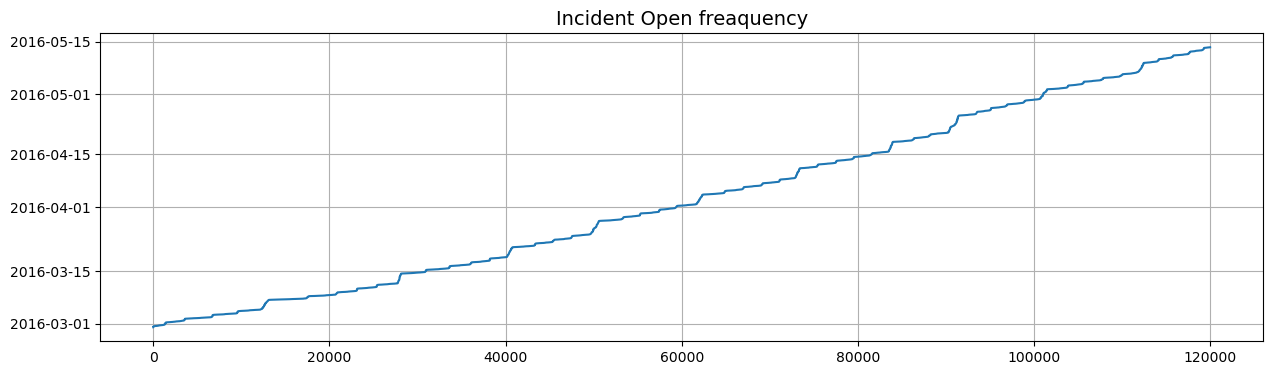

In [ ]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.plot(data['opened_at'])
plt.title("Incident Open freaquency", size = 14)
#plt.xlabel("Reopen", size=12)
#plt.ylabel("Count", size=12)
plt.grid()
plt.show()

In [ ]:
data.columns


Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_at', 'sys_updated_by', 'sys_updated_at',
       'contact_type', 'location', 'category', 'subcategory', 'u_symptom',
       'cmdb_ci', 'impact', 'urgency', 'priority', 'assignment_group',
       'assigned_to', 'knowledge', 'u_priority_confirmation', 'notify',
       'problem_id', 'rfc', 'vendor', 'caused_by', 'closed_code',
       'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [ ]:
# data[data.sys_created_by=='?'].shape
# data.sys_created_by.value_counts()
# data.drop('sys_created_by',axis =1,inplace=True)
data.sys_created_at.value_counts()


sys_created_at
?                  42354
15/3/2016 15:19       52
19/4/2016 11:32       47
4/3/2016 10:31        46
10/3/2016 09:39       44
                   ...  
17/3/2016 08:51        2
17/3/2016 09:08        2
27/3/2016 20:09        2
26/4/2016 17:07        2
4/4/2016 08:38         2
Name: count, Length: 9980, dtype: int64

In [ ]:
from daily_event_analysis import plot_daily_events
from daily_event_analysis import DailyEventAnalyzer


In [ ]:
# data=
# data[data.sys_created_at=='?']
# data[data.sys_created_at=='?'].shape
data_2 = data.drop(data[data.sys_created_at=='?'].index)


In [ ]:
data_2.shape

(77642, 35)

In [ ]:
analyzer = DailyEventAnalyzer(data_2)

In [ ]:
# 使用实际数据
analyzer = plot_daily_events(data_2, datetime_col='sys_created_at', 
                           figsize=(15, 8), save_path='daily_events_trend.png')


每日事件统计摘要:
时间范围: 2016-02-29 到 2016-05-13
总天数: 75
总事件数: 77642
平均每日事件数: 1035.23
中位数每日事件数: 1136.0
标准差: 727.8
最大值: 3321
最大值日期: 2016-03-07
最小值: 78
最小值日期: 2016-04-23
峰值系数: 3.21


OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
daily_counts=analyzer.calculate_daily_counts()

In [ ]:
import seaborn as seaborn



In [ ]:
def plot_daily_line(figsize=(15, 8), save_path=None, style='seaborn'):
        """
        绘制每日事件数量折线图
        
        参数:
        figsize: 图形大小
        save_path: 保存路径
        style: 绘图风格
        """
        if daily_counts is None:
            calculate_daily_counts()
            
        if daily_counts is None or len(daily_counts) == 0:
            print("没有数据可供绘制")
            return
            
        # 设置绘图风格
        # plt.style.use(style)
        
        fig, ax = plt.subplots(figsize=figsize)
        
        # 绘制折线图
        ax.plot(daily_counts.index, daily_counts.values, 
                linewidth=2, marker='o', markersize=4, 
                color='#1f77b4', alpha=0.8)
        
        # 设置标题和标签
        ax.set_title('每日事件创建数量趋势', fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('日期', fontsize=12)
        ax.set_ylabel('事件数量', fontsize=12)
        
        # 格式化x轴
        fig.autofmt_xdate()
        
        # 添加网格
        ax.grid(True, alpha=0.3, linestyle='--')
        
        # 添加统计信息
        max_day = daily_counts.idxmax()
        max_count = daily_counts.max()
        min_day = daily_counts.idxmin()
        min_count = daily_counts.min()
        avg_count = daily_counts.mean()
        
        # 在图上标注最大值
        ax.annotate(f'最大值: {max_count}', 
                    xy=(max_day, max_count), 
                    xytext=(10, 10), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
        
        # 添加统计文本框
        stats_text = f'总天数: {len(daily_counts)}\n'
        stats_text += f'总事件数: {daily_counts.sum()}\n'
        stats_text += f'平均每日: {avg_count:.1f}\n'
        stats_text += f'最大日: {max_count} ({max_day})\n'
        stats_text += f'最小日: {min_count} ({min_day})'
        
        ax.text(0.02, 0.98, stats_text, 
                transform=ax.transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
        
        # 旋转x轴标签
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        
        plt.show()

In [ ]:


# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


# 事件创建时间分布

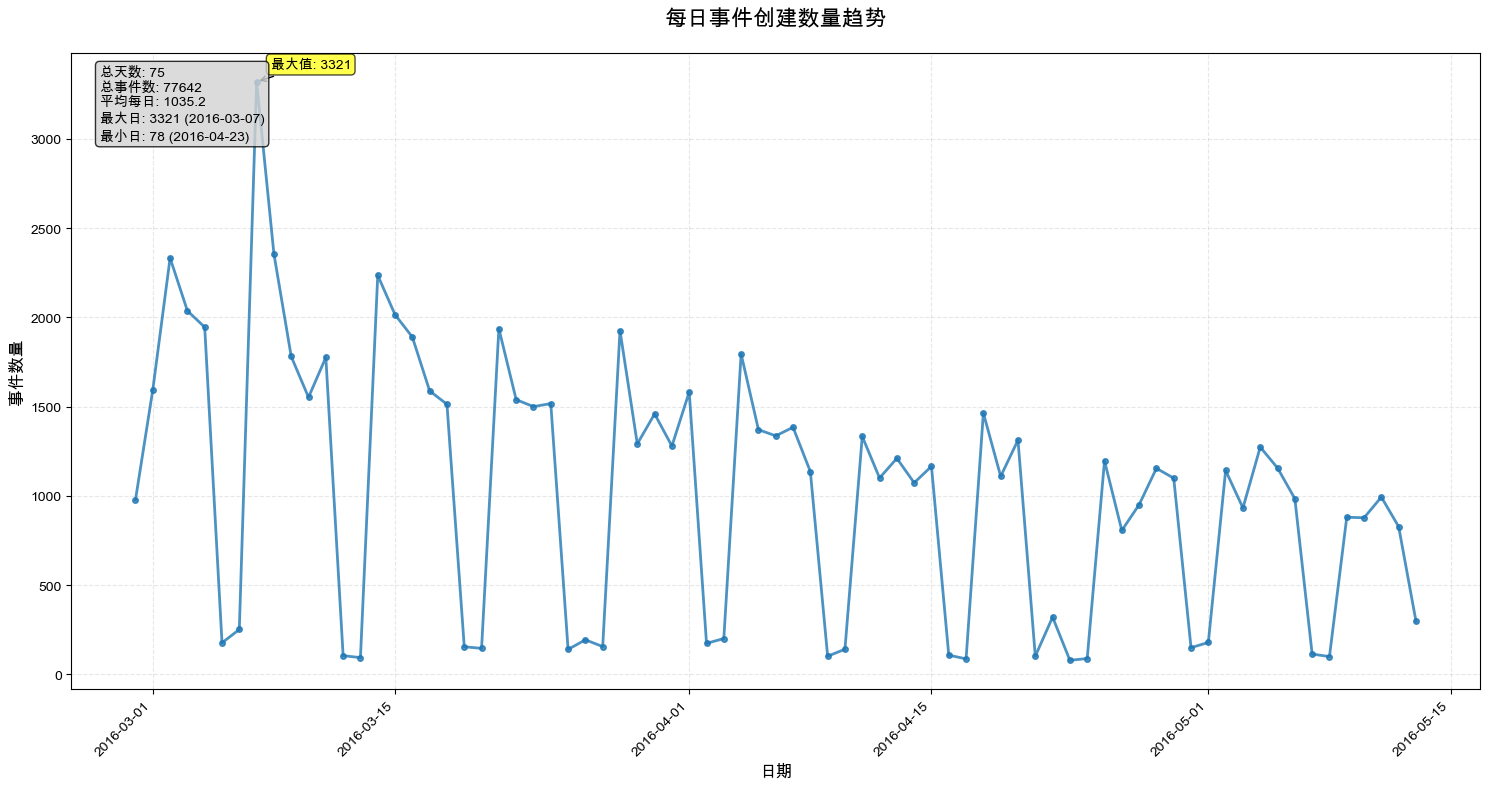

In [ ]:

# 绘制图表
figsize=(15, 8)
save_path=None
style='seaborn'
plot_daily_line(figsize=figsize, save_path=save_path)
    

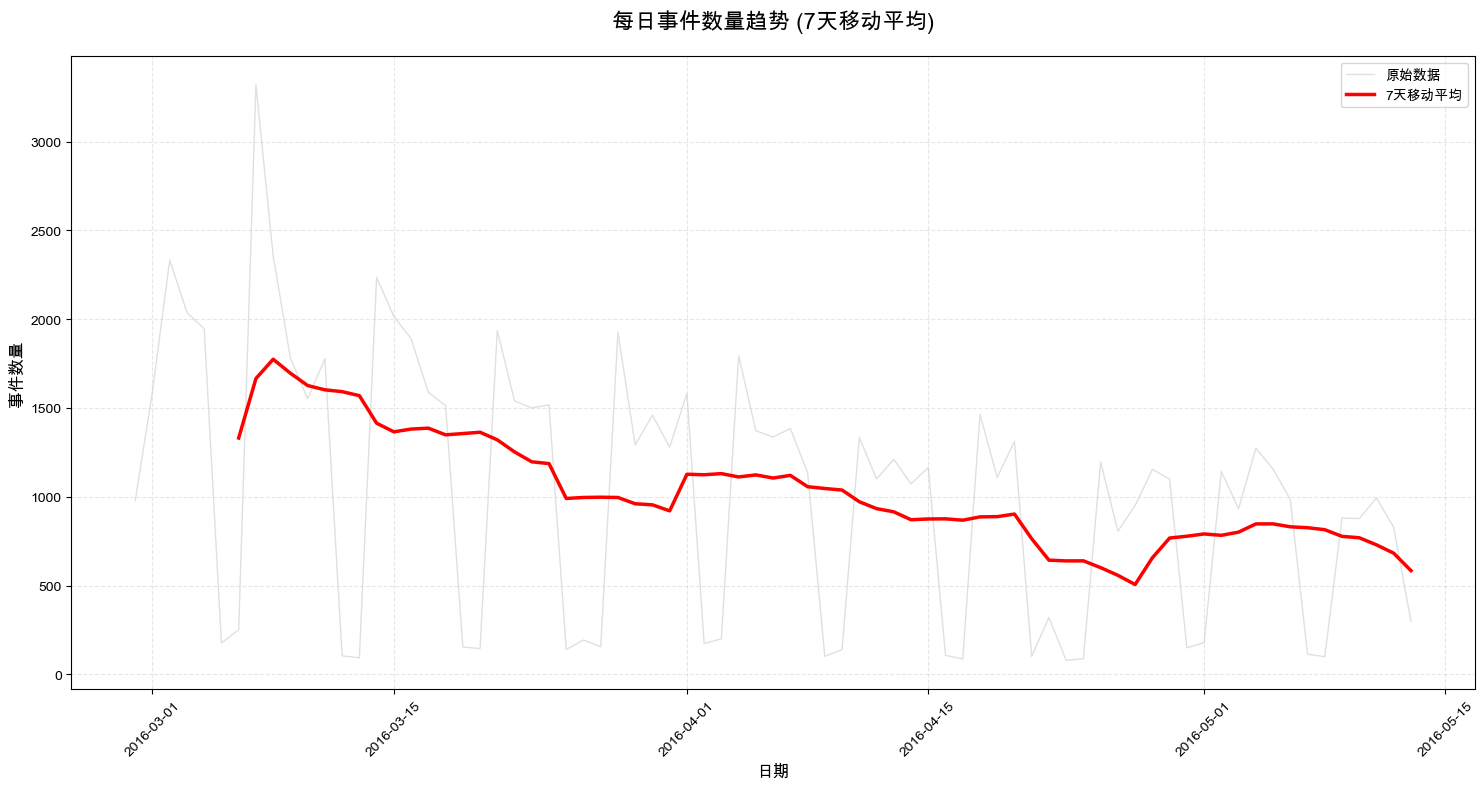

In [ ]:

# 绘制带移动平均的图
analyzer.plot_with_trend(window=7, save_path='weekly_trend.png')


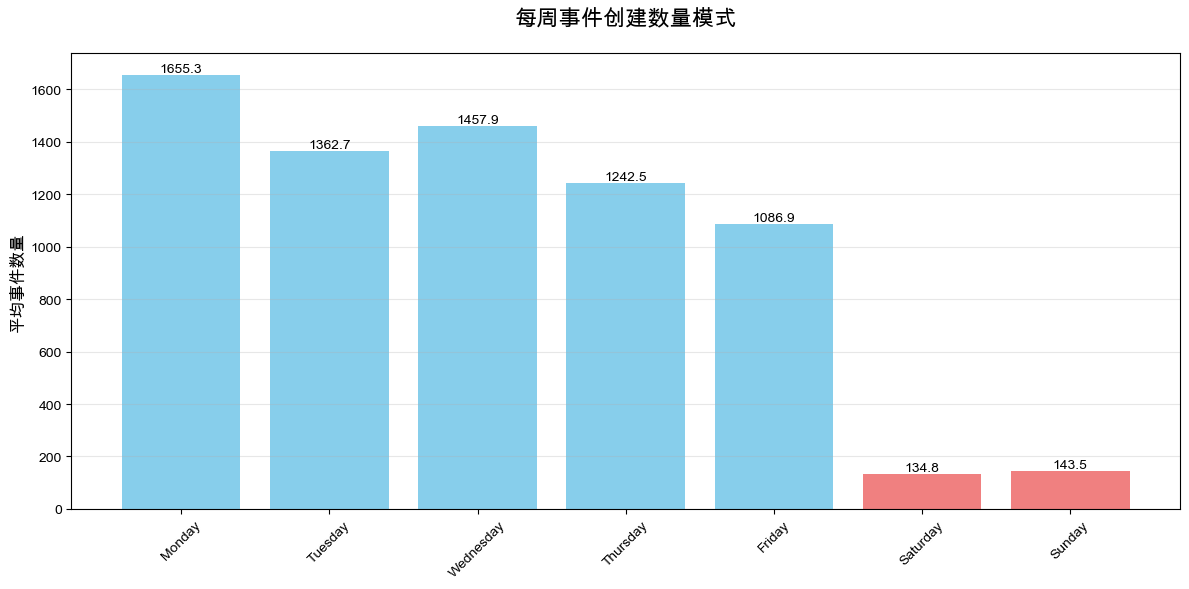

In [ ]:

# 绘制每周模式
analyzer.plot_weekly_pattern(save_path='weekly_pattern.png')


In [ ]:

# 获取详细统计
stats = analyzer.get_summary_stats()
print("详细统计:", stats)

详细统计: {'时间范围': '2016-02-29 到 2016-05-13', '总天数': 75, '总事件数': 77642, '平均每日事件数': 1035.23, '中位数每日事件数': 1136.0, '标准差': 727.8, '最大值': 3321, '最大值日期': datetime.date(2016, 3, 7), '最小值': 78, '最小值日期': datetime.date(2016, 4, 23), '峰值系数': 3.21}


# 更新时间

In [ ]:
data.sys_updated_at

0        2016-02-29 01:23:00
1        2016-02-29 08:53:00
2        2016-02-29 11:29:00
3        2016-03-05 12:00:00
4        2016-02-29 04:57:00
                 ...        
119993   2016-05-13 12:15:00
119994   2016-05-18 13:07:00
119995   2016-05-13 11:48:00
119996   2016-05-18 12:07:00
119997   2016-05-13 11:49:00
Name: sys_updated_at, Length: 119996, dtype: datetime64[ns]

In [ ]:
data.sys_updated_at = pd.to_datetime(data.sys_updated_at)
data.sys_updated_at.dt.date.value_counts()


sys_updated_at
2016-03-24    4924
2016-04-04    2740
2016-03-09    2706
2016-03-08    2667
2016-04-05    2555
              ... 
2016-10-14       1
2016-10-28       1
2016-11-07       1
2016-10-16       1
2016-08-25       1
Name: count, Length: 297, dtype: int64

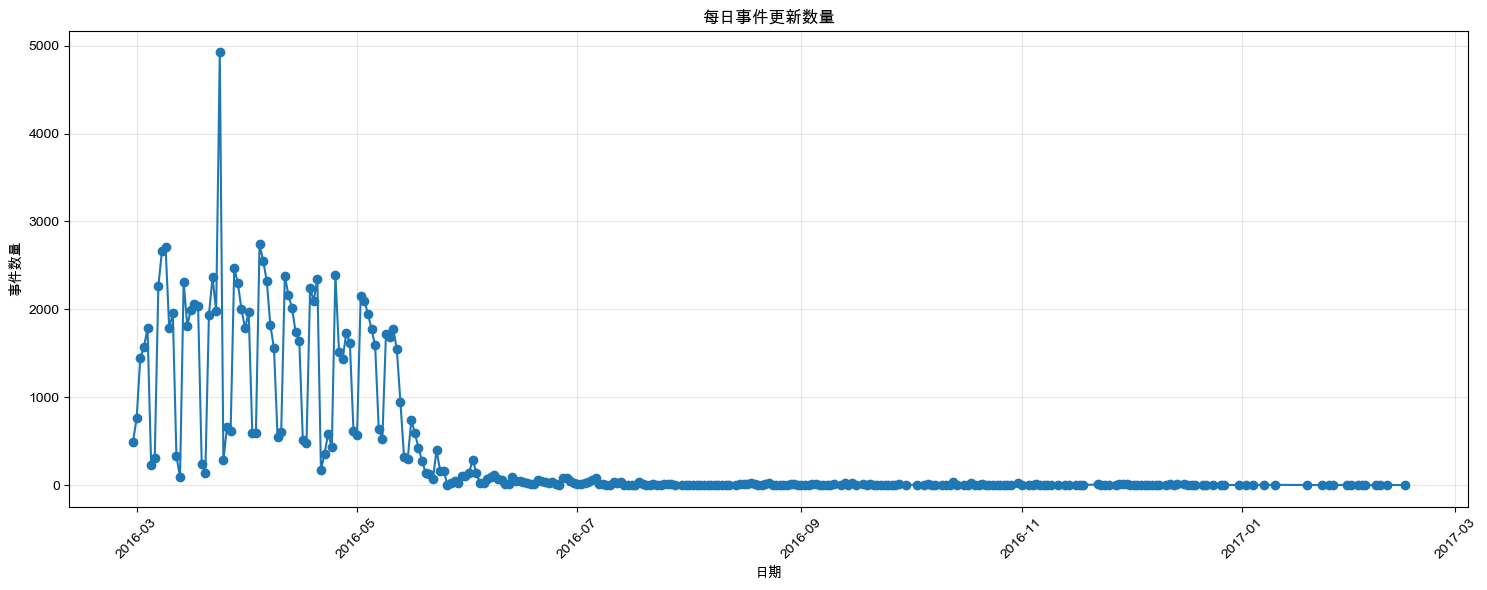

In [ ]:
# 快速按天统计并绘图
daily_counts = data['sys_updated_at'].dt.date.value_counts().sort_index()
plt.figure(figsize=(15, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o')
plt.title('每日事件更新数量')
plt.xlabel('日期')
plt.ylabel('事件数量')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 通知方式

In [ ]:
data['contact_type'].value_counts()


contact_type
Phone    119877
Email       119
Name: count, dtype: int64

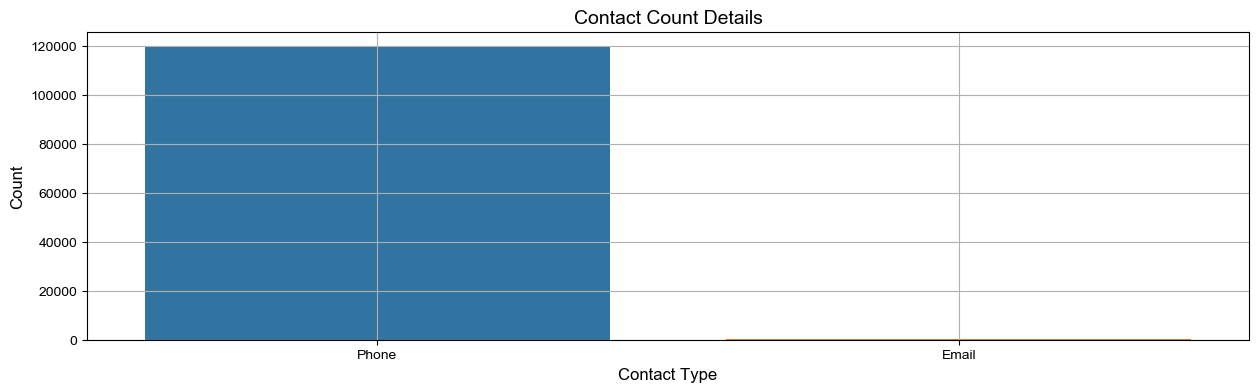

In [ ]:
# 'contact_type'
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='contact_type', data= data,ax=ax)
plt.title("Contact Count Details", size = 14)
plt.xlabel("Contact Type", size=12)
plt.ylabel("Count", size=12)
#plt.xticks(rotation=90)
plt.grid()
plt.show()


In [ ]:
data.location.value_counts()


location
Location 204    27153
Location 161    18433
Location 143    16129
Location 108    10635
Location 93     10093
                ...  
Location 207        3
Location 89         3
Location 164        3
Location 166        2
Location 31         2
Name: count, Length: 203, dtype: int64

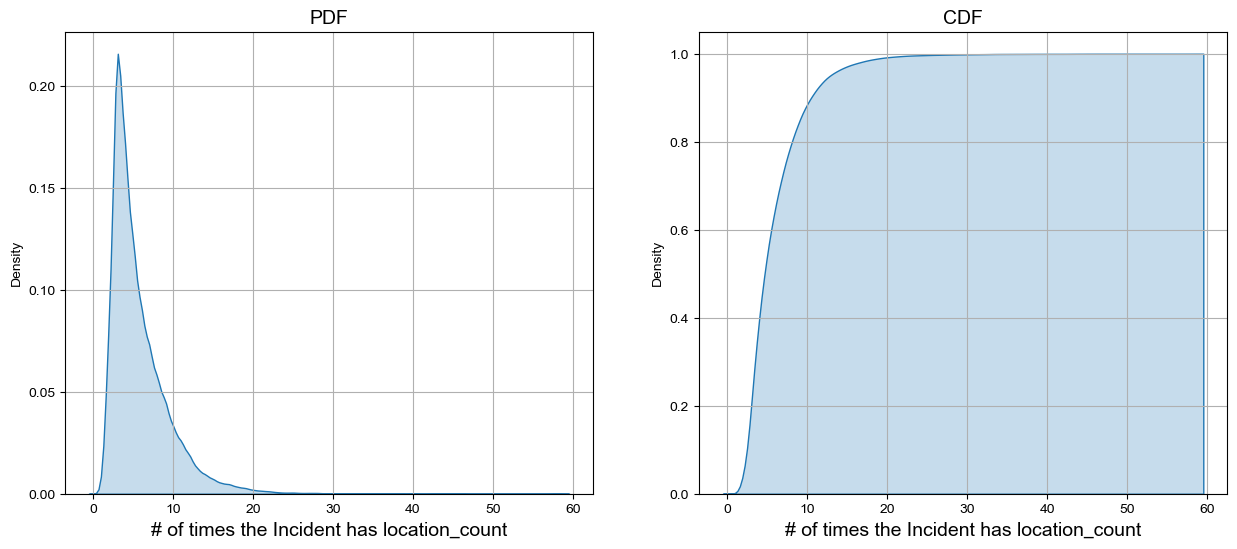

In [ ]:
# Grouping the Incidents by wrt its sys_mod_count count
location_cnt = data.groupby(by='number')['location'].count().sort_values(ascending=False)

fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(121)
sns.kdeplot(location_cnt, shade=True, ax=ax1)
plt.xlabel('# of times the Incident has location_count',size = 14)
plt.title("PDF",size = 14)
ax1.grid()
ax2 = plt.subplot(122)
sns.kdeplot(location_cnt, shade=True, cumulative=True,ax=ax2)
plt.xlabel('# of times the Incident has location_count',size = 14)
plt.title('CDF',size = 14)
ax2.grid()
plt.show()

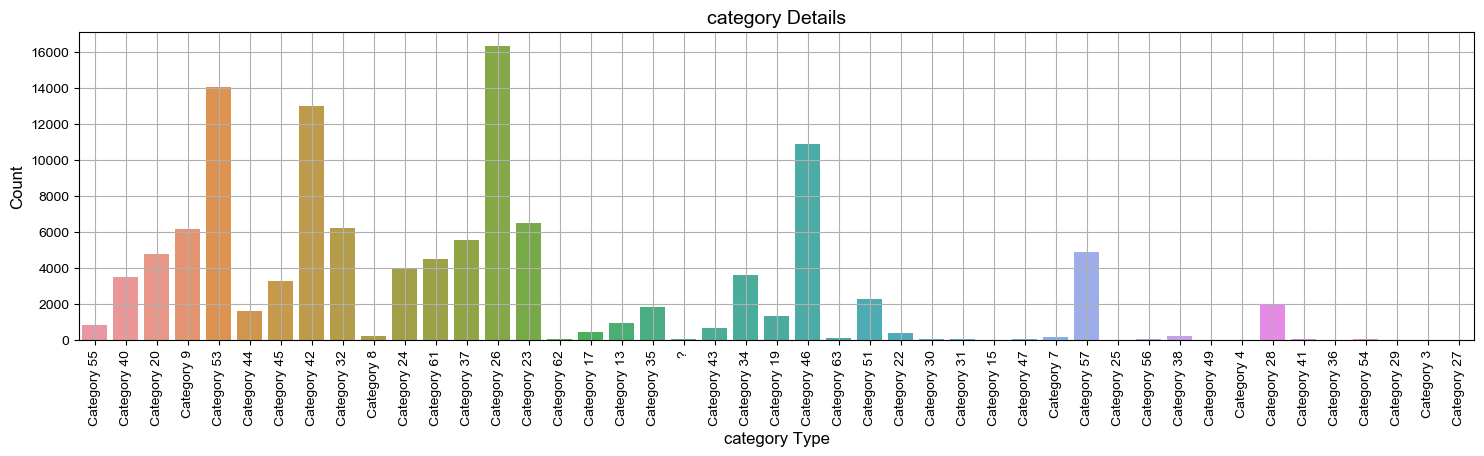

In [ ]:
# 'category'
fig_dims = (18, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='category', data = data,ax=ax)
plt.title("category Details", size = 14)
plt.xlabel("category Type", size=12)
plt.ylabel("Count", size=12)
plt.xticks(rotation=90)
plt.grid()
plt.show()

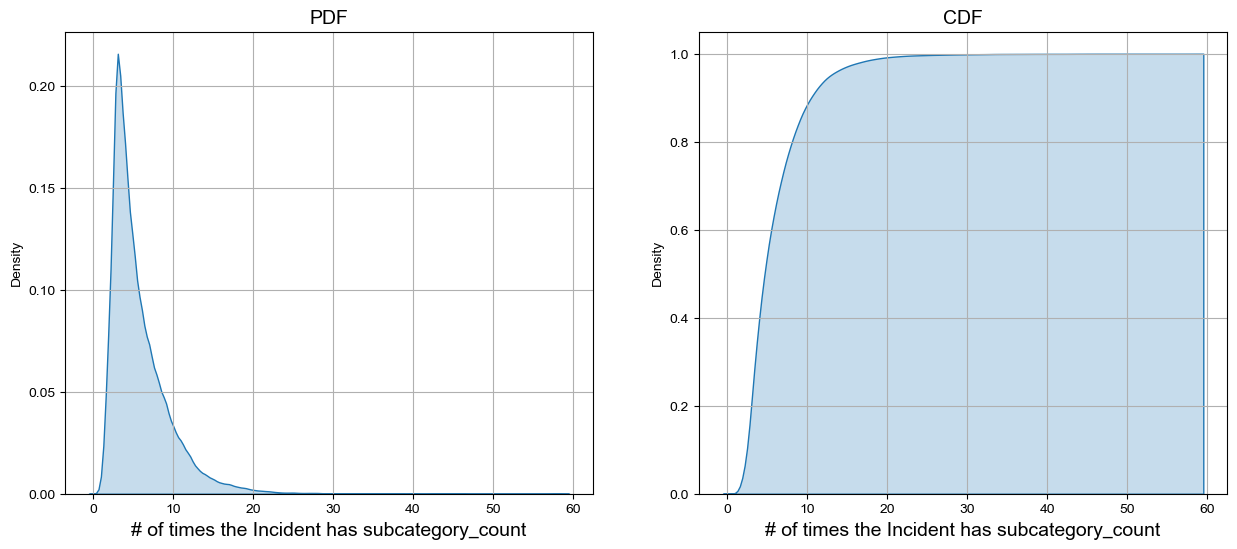

In [ ]:
# Grouping the Incidents by wrt its sys_mod_count count
subcategory_cnt = data.groupby(by='number')['subcategory'].count().sort_values(ascending=False)

fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(121)
sns.kdeplot(subcategory_cnt, shade=True, ax=ax1)
plt.xlabel('# of times the Incident has subcategory_count',size = 14)
plt.title("PDF",size = 14)
ax1.grid()
ax2 = plt.subplot(122)
sns.kdeplot(subcategory_cnt, shade=True, cumulative=True,ax=ax2)
plt.xlabel('# of times the Incident has subcategory_count',size = 14)
plt.title('CDF',size = 14)
ax2.grid()
plt.show()


In [ ]:
# data.drop('cmdb_ci',axis =1,inplace=True)
data.impact.value_counts()

impact
2 - Medium    113689
3 - Low         3418
1 - High        2889
Name: count, dtype: int64

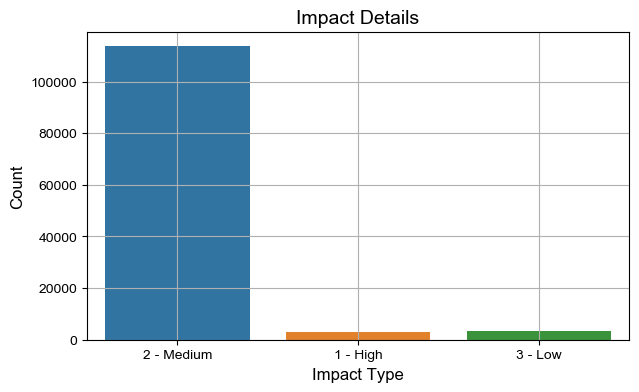

impact
2 - Medium    113689
3 - Low         3418
1 - High        2889
Name: count, dtype: int64

In [ ]:
# 'impact' - This a very important field as based on this a service company calculates profit or penalty
# This plays a major role in our Incident resolution time as well
fig_dims = (7, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'impact', data = data,ax=ax)
plt.title("Impact Details", size = 14)
plt.xlabel("Impact Type", size=12)
plt.ylabel("Count", size=12)
#plt.xticks(rotation=90)
plt.grid()
plt.show()
data['impact'].value_counts()

In [ ]:
data.urgency.value_counts()

urgency
2 - Medium    113548
1 - High        3303
3 - Low         3145
Name: count, dtype: int64

In [ ]:
data.priority.value_counts()

priority
3 - Moderate    112113
4 - Low           3549
2 - High          2499
1 - Critical      1835
Name: count, dtype: int64

In [ ]:
data['assigned_to'].value_counts()
data[data.assigned_to=='?']['assigned_to'].value_counts().sum()/data.shape[0]*100

data.drop(['assignment_group', 'assigned_to'],axis=1,inplace=True)


In [ ]:
data['notify'].value_counts() # Almost for all the tickets notification has not been sent


notify
Do Not Notify    119877
Send Email          119
Name: count, dtype: int64

In [ ]:
data['problem_id'].value_counts()


problem_id
?                  118059
Problem ID  14        184
Problem ID  2         147
Problem ID  52         82
Problem ID  95         40
                    ...  
Problem ID  181         1
Problem ID  88          1
Problem ID  195         1
Problem ID  11          1
Problem ID  33          1
Name: count, Length: 216, dtype: int64

In [232]:
# data.drop('problem_id',axis=1,inplace=True)


In [ ]:
data['rfc'].value_counts()
data['vendor'].value_counts()
data['caused_by'].value_counts()
data.closed_code.value_counts()
data.drop('resolved_by',axis=1,inplace=True)



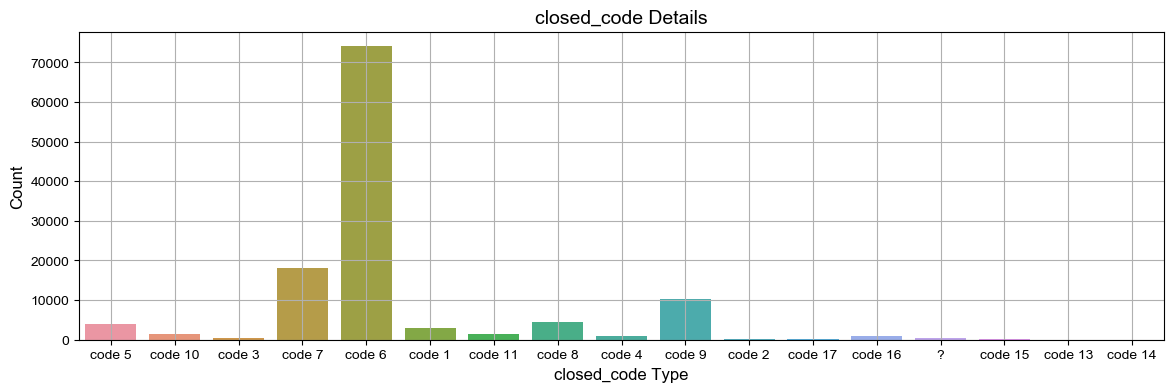

closed_code
code 6     74039
code 7     18064
code 9     10187
code 8      4480
code 5      3863
code 1      3044
code 10     1455
code 11     1411
code 4       911
code 16      905
code 3       534
?            525
code 2       288
code 15      147
code 17       99
code 13       41
code 14        3
Name: count, dtype: int64

In [ ]:
# Incident closure details
fig_dims = (14, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= 'closed_code', data = data,ax=ax)
plt.title("closed_code Details", size = 14)
plt.xlabel("closed_code Type", size=12)
plt.ylabel("Count", size=12)
plt.grid()
plt.show()
data['closed_code'].value_counts()

In [ ]:
data['closed_at']=pd.to_datetime(data['closed_at'], format='%d/%m/%Y %H:%M')


# 开展模型构建，预测工单什么时候能关闭结束

In [234]:
data.columns


Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'opened_by',
       'sys_created_at', 'sys_updated_at', 'contact_type', 'location',
       'category', 'subcategory', 'u_symptom', 'impact', 'urgency', 'priority',
       'knowledge', 'u_priority_confirmation', 'notify', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'Difference', 'Difference_In_Hours',
       'Difference_In_Mins', 'Target', 'day_of_week', 'month', 'day'],
      dtype='object')

In [237]:
data.dtypes

number                             object
incident_state                     object
active                               bool
reassignment_count                  int64
reopen_count                        int64
sys_mod_count                       int64
made_sla                             bool
opened_by                          object
sys_created_at                     object
sys_updated_at             datetime64[ns]
contact_type                       object
location                           object
category                           object
subcategory                        object
u_symptom                          object
impact                             object
urgency                            object
priority                           object
knowledge                            bool
u_priority_confirmation              bool
notify                             object
rfc                                object
vendor                             object
caused_by                         

In [ ]:
# data.drop(['sys_created_by','sys_created_at','sys_updated_at','cmdb_ci','assignment_group', 'assigned_to','problem_id','resolved_by'],axis=1,inplace=True)

In [ ]:
data['opened_at']=pd.to_datetime(data['opened_at'], format='%d/%m/%Y %H:%M')
data['closed_at']=pd.to_datetime(data['closed_at'], format='%d/%m/%Y %H:%M')
data['Difference'] = (data['closed_at'] - data['opened_at']).dt.days
data['Difference_In_Hours'] = (data['closed_at'] - data['opened_at']).dt.total_seconds() / 3600 
data['Difference_In_Mins'] = (data['closed_at'] - data['opened_at']).dt.total_seconds() / 60 

data['Difference'] = np.array(data['Difference'])

In [238]:
data.columns


Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'opened_by',
       'sys_created_at', 'sys_updated_at', 'contact_type', 'location',
       'category', 'subcategory', 'u_symptom', 'impact', 'urgency', 'priority',
       'knowledge', 'u_priority_confirmation', 'notify', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'Difference', 'Difference_In_Hours',
       'Difference_In_Mins', 'Target', 'day_of_week', 'month', 'day'],
      dtype='object')

In [239]:
# data.Difference.describe()
# data.Difference_In_Hours.describe()
data.Difference_In_Mins.describe()

count    119996.000000
mean      25440.853795
std       40001.602926
min           2.000000
25%        7679.000000
50%       14631.000000
75%       25922.250000
max      491437.000000
Name: Difference_In_Mins, dtype: float64

In [240]:
np.sort(data['Difference'].unique())


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 41, 42])

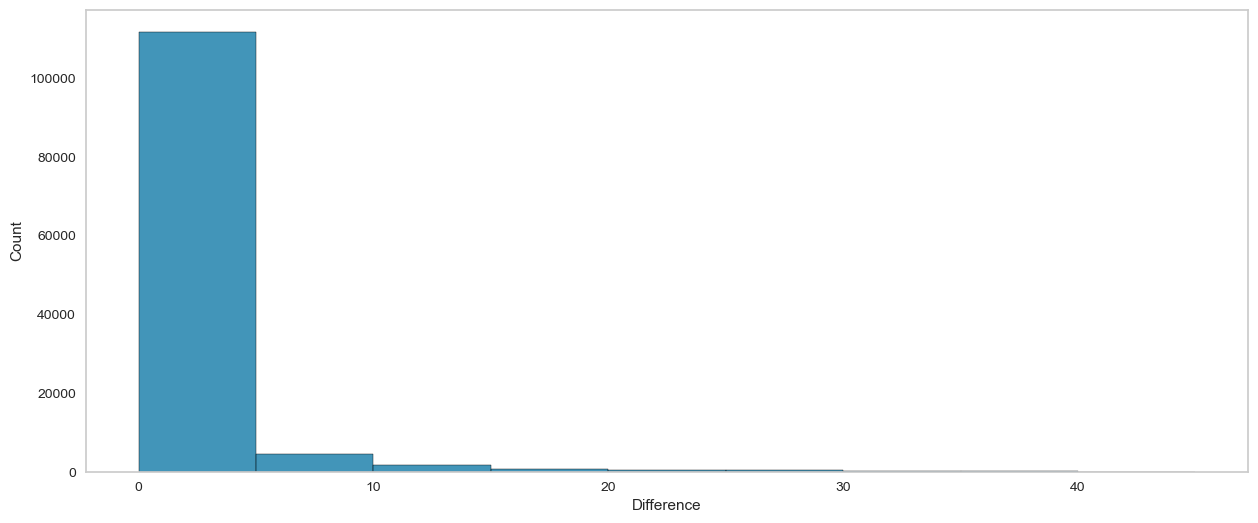

In [227]:
# Lets see the distribution of this dependent variable that we have created
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot((data['Difference']),binwidth=5)
plt.grid()
plt.show()

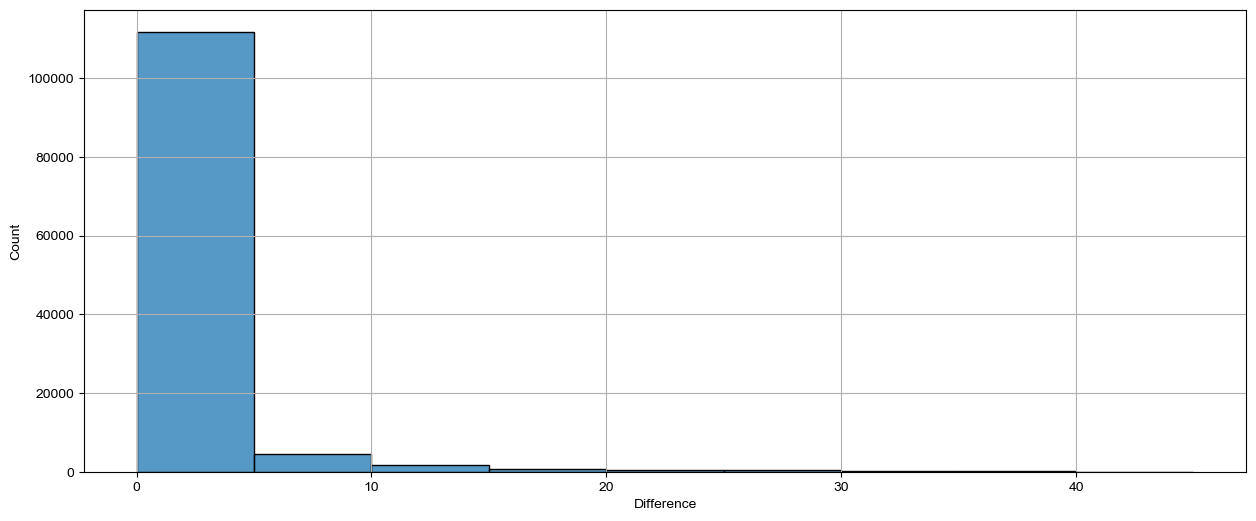

In [126]:
# Lets see the distribution of this dependent variable that we have created
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(np.abs((data['Difference'])/8),binwidth=5)
plt.grid()
plt.show()

In [133]:
np.sort(np.abs((data['Difference'])/8).astype(int).unique())


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 41, 42])

In [134]:
data['Difference'] = np.abs((data['Difference'])/8).astype(int)


In [135]:
def cut(arr):
    bins = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x >= 0) & (x < 5):
            bins[idx] = 1
        elif (x >= 5) & (x < 11):
            bins[idx] = 2
        elif (x >= 11) & (x < 21):
            bins[idx] = 3
        elif (x >= 21) & (x < 31):
            bins[idx] = 4
        else:
            bins[idx] = 5
    return bins

In [136]:
data['Target'] = cut(data['Difference'].to_numpy())


# 针对恢复时间小时进行分析

In [261]:
data['Difference_In_Hours'].describe()

count    119996.000000
mean        424.014230
std         666.693382
min           0.033333
25%         127.983333
50%         243.850000
75%         432.037500
max        8190.616667
Name: Difference_In_Hours, dtype: float64

<Axes: ylabel='Frequency'>

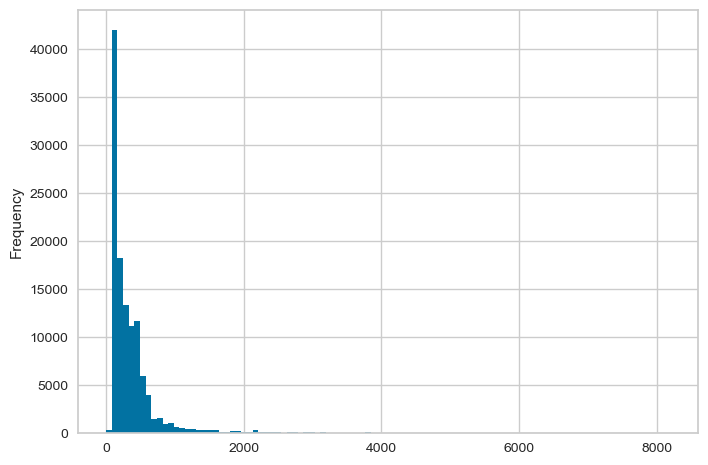

In [262]:
data['Difference_In_Hours'].plot.hist(bins=100)
# data['Difference_In_Hours'].plot.hist(bins=50,logy=True)


In [254]:
data['Difference_In_Mins'].value_counts()

Difference_In_Mins
7245.0     383
7259.0     346
7257.0     342
7242.0     334
7254.0     331
          ... 
13333.0      2
13292.0      2
13279.0      2
99190.0      2
13278.0      1
Name: count, Length: 10015, dtype: int64

In [264]:
def cut2(arr):
    bins = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x >= 0) & (x < 100):
            bins[idx] = 1
        elif (x >= 100) & (x < 200):
            bins[idx] = 2
        elif (x >= 200) & (x < 300):
            bins[idx] = 3
        elif (x >= 300) & (x < 400):
            bins[idx] = 4
        else:
            bins[idx] = 5
    return bins

In [ ]:
data['Target'] = cut(data['Difference'].to_numpy())


In [265]:
data['Target_Recovery_Hours'] = cut2(data['Difference_In_Hours'])


In [137]:
data.to_pickle('data_1.pkl')


In [ ]:
data.to_pickle('data_Target_Recovery_Hours.pkl')

In [266]:
data['Target_Recovery_Hours'].value_counts()


Target_Recovery_Hours
2.0    51715
5.0    36141
3.0    17486
4.0    14243
1.0      411
Name: count, dtype: int64

In [142]:
data.u_symptom.value_counts()
data.u_symptom.value_counts()['?']/data.shape[0]*100
data.rfc.value_counts()['?']/data.shape[0]*100

data.caused_by.value_counts()['?']/data.shape[0]*100


99.98499949998333

In [143]:
# Day of the week column, month and day
data['day_of_week'] = data['opened_at'].dt.day_name()
data['month'] = data['opened_at'].dt.month
data['day'] = data['opened_at'].dt.day

In [144]:
data.drop(['caller_id','sys_updated_by','opened_at','resolved_at','closed_at'],axis=1,inplace=True)

In [267]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'opened_by',
       'sys_created_at', 'sys_updated_at', 'contact_type', 'location',
       'category', 'subcategory', 'u_symptom', 'impact', 'urgency', 'priority',
       'knowledge', 'u_priority_confirmation', 'notify', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'Difference', 'Difference_In_Hours',
       'Difference_In_Mins', 'Target', 'day_of_week', 'month', 'day',
       'Target_Recovery_Hours'],
      dtype='object')

In [268]:
data.select_dtypes(include=['object']).columns

Index(['number', 'incident_state', 'opened_by', 'sys_created_at',
       'contact_type', 'location', 'category', 'subcategory', 'u_symptom',
       'impact', 'urgency', 'priority', 'notify', 'rfc', 'vendor', 'caused_by',
       'closed_code', 'day_of_week'],
      dtype='object')

In [243]:
data.select_dtypes(include=['number']).columns


Index(['reassignment_count', 'reopen_count', 'sys_mod_count', 'Difference',
       'Difference_In_Hours', 'Difference_In_Mins', 'Target', 'month', 'day'],
      dtype='object')

In [244]:
data.number.value_counts()
data.closed_code.value_counts()

closed_code
code 6     74039
code 7     18064
code 9     10187
code 8      4480
code 5      3863
code 1      3044
code 10     1455
code 11     1411
code 4       911
code 16      905
code 3       534
?            525
code 2       288
code 15      147
code 17       99
code 13       41
code 14        3
Name: count, dtype: int64

In [269]:
data

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,opened_by,sys_created_at,sys_updated_at,...,caused_by,closed_code,Difference,Difference_In_Hours,Difference_In_Mins,Target,day_of_week,month,day,Target_Recovery_Hours
0,INC0000045,New,True,0,0,0,True,Opened by 8,29/2/2016 01:23,2016-02-29 01:23:00,...,?,code 5,0,130.733333,7844.0,1.0,Monday,2,29,2.0
1,INC0000045,Resolved,True,0,0,2,True,Opened by 8,29/2/2016 01:23,2016-02-29 08:53:00,...,?,code 5,0,130.733333,7844.0,1.0,Monday,2,29,2.0
2,INC0000045,Resolved,True,0,0,3,True,Opened by 8,29/2/2016 01:23,2016-02-29 11:29:00,...,?,code 5,0,130.733333,7844.0,1.0,Monday,2,29,2.0
3,INC0000045,Closed,False,0,0,4,True,Opened by 8,29/2/2016 01:23,2016-03-05 12:00:00,...,?,code 5,0,130.733333,7844.0,1.0,Monday,2,29,2.0
4,INC0000047,New,True,0,0,0,True,Opened by 397,29/2/2016 04:57,2016-02-29 04:57:00,...,?,code 5,0,149.333333,8960.0,1.0,Monday,2,29,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119993,INC0029231,Resolved,True,0,0,8,True,Opened by 17,?,2016-05-13 12:15:00,...,?,code 7,0,121.350000,7281.0,1.0,Friday,5,13,2.0
119994,INC0029231,Closed,False,0,0,9,True,Opened by 17,?,2016-05-18 13:07:00,...,?,code 7,0,121.350000,7281.0,1.0,Friday,5,13,2.0
119995,INC0029232,Resolved,True,0,0,0,True,Opened by 108,?,2016-05-13 11:48:00,...,?,code 6,0,120.316667,7219.0,1.0,Friday,5,13,2.0
119996,INC0029232,Closed,False,0,0,1,True,Opened by 108,?,2016-05-18 12:07:00,...,?,code 6,0,120.316667,7219.0,1.0,Friday,5,13,2.0


# EDA

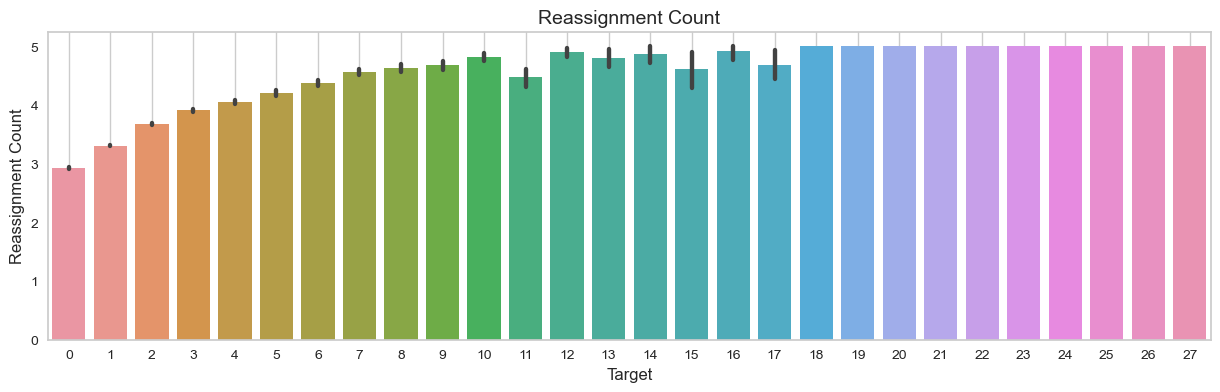

In [270]:
# reassignment_count
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=data,x= 'reassignment_count',y='Target_Recovery_Hours',ax=ax)
plt.title("Reassignment Count", size = 14)
plt.xlabel("Target", size=12)
plt.ylabel("Reassignment Count", size=12)
#plt.xticks(rotation=10)
plt.grid()
plt.show()

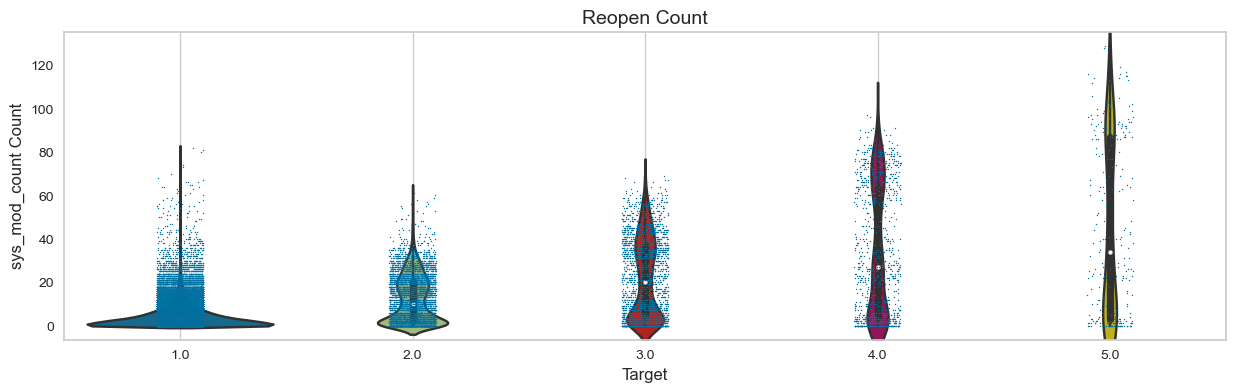

In [246]:
# sys_mod_count
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.violinplot(data=data,x= 'Target',y='sys_mod_count',ax=ax)
sns.stripplot(data=data,y= 'sys_mod_count',x='Target',ax=ax,jitter=True,size=1)
plt.title("Reopen Count", size = 14)
plt.xlabel("Target", size=12)
plt.ylabel("sys_mod_count Count", size=12)
plt.grid()
plt.show()

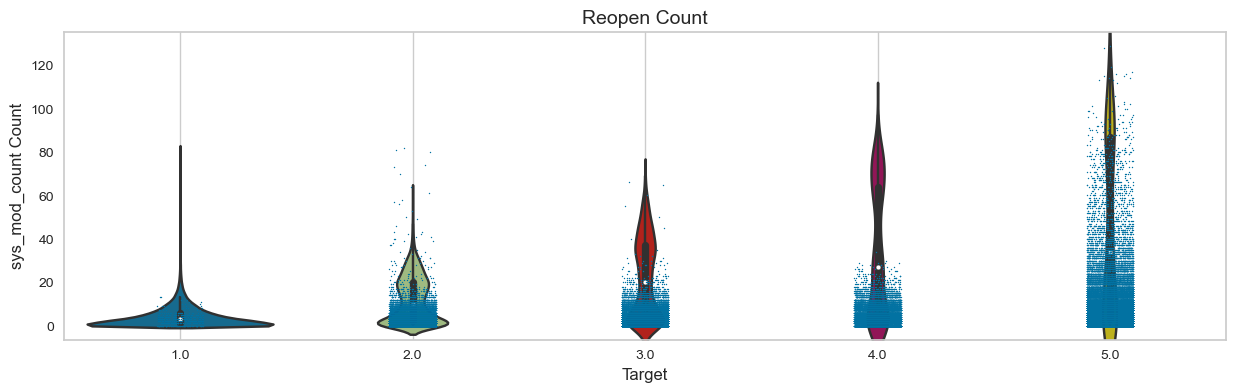

In [271]:
# sys_mod_count
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.violinplot(data=data,x= 'Target',y='sys_mod_count',ax=ax)
sns.stripplot(data=data,y= 'sys_mod_count',x='Target_Recovery_Hours',ax=ax,jitter=True,size=1)
plt.title("Reopen Count", size = 14)
plt.xlabel("Target", size=12)
plt.ylabel("sys_mod_count Count", size=12)
plt.grid()
plt.show()

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

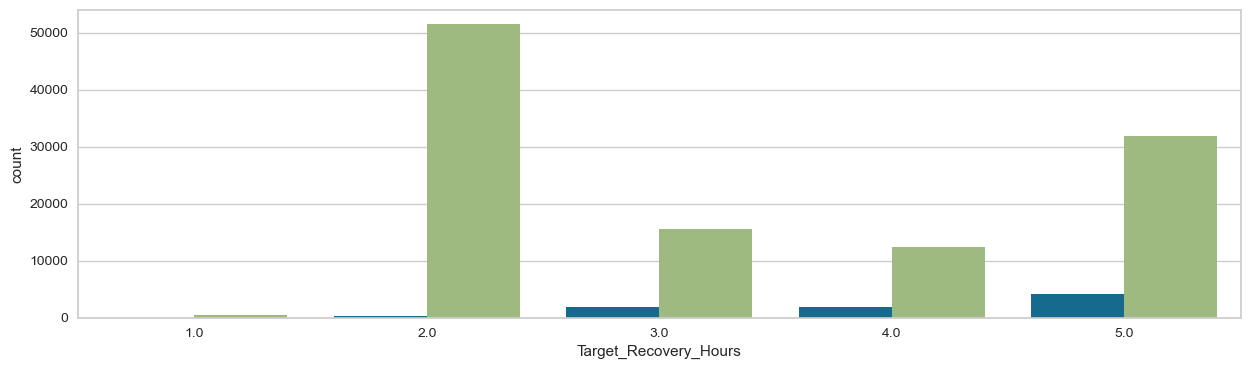

In [272]:
# made_sla
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=data,x='Target_Recovery_Hours',ax=ax,hue='made_sla')
plt.title("Reopen Count", size = 14)
plt.xlabel("Target", size=12)
plt.ylabel("Reassignment Count", size=12)
plt.grid()
plt.show()

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

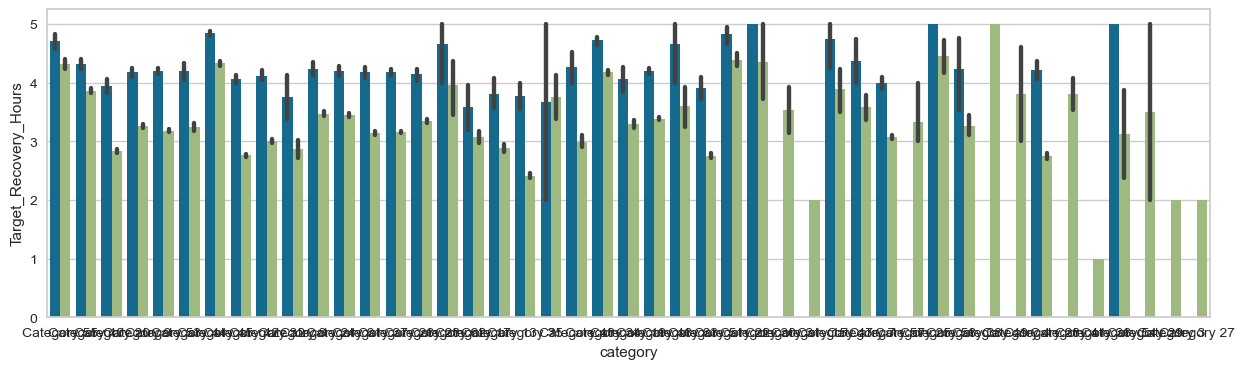

In [273]:
# category
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=data,x= 'category',y='Target_Recovery_Hours',ax=ax,hue='made_sla')
plt.title("category", size = 14)
plt.xlabel("category count", size=12)
plt.ylabel("Target", size=12)
plt.xticks(rotation=90)
plt.grid()
plt.show()

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

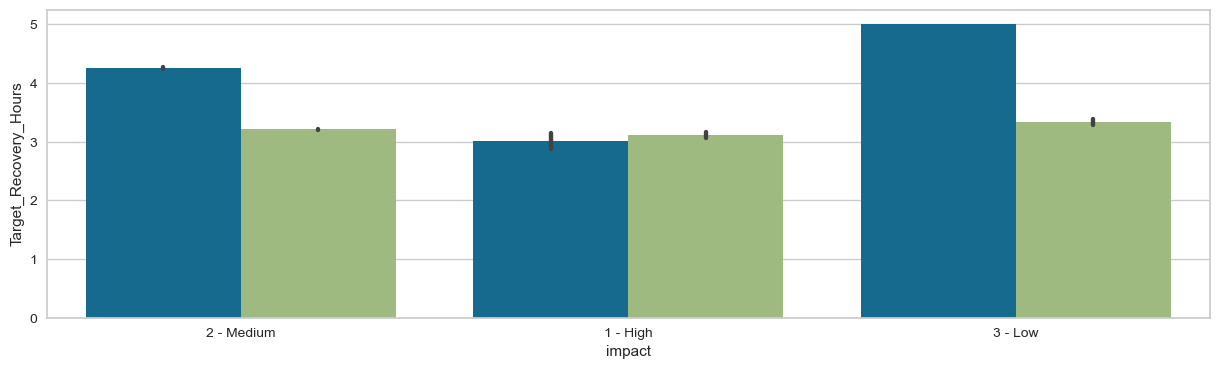

In [274]:
# impact
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=data,x= 'impact',y='Target_Recovery_Hours',ax=ax,hue='made_sla')
plt.title("Impact", size = 14)
plt.xlabel("Impact count", size=12)
plt.ylabel("Target", size=12)
#plt.xticks(rotation=90)
plt.grid()
plt.show()

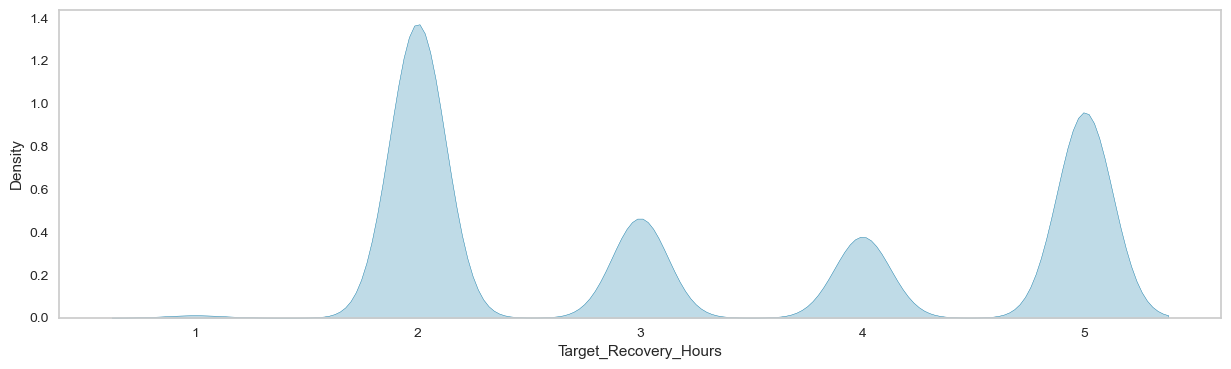

In [275]:
# Lets check the distribution of the dependent variable
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.kdeplot(data['Target_Recovery_Hours'],fill=True,cmap="mako")
plt.grid()
plt.show()

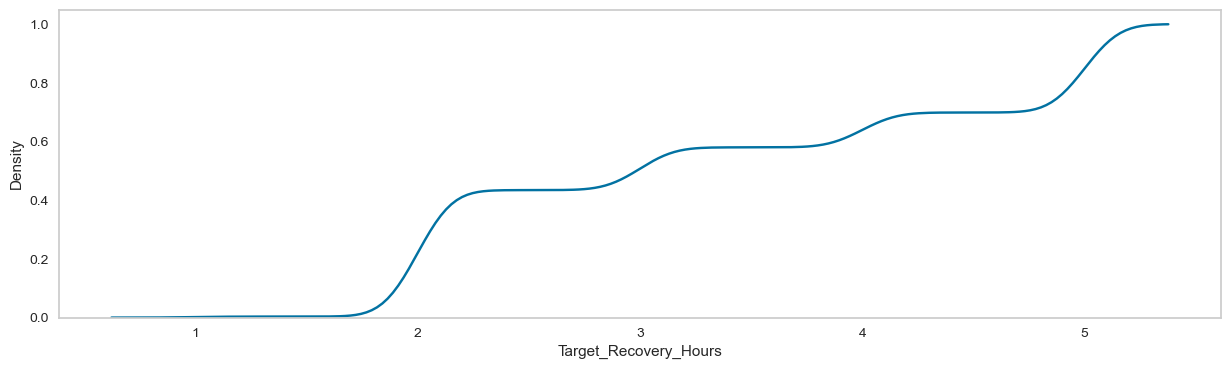

In [277]:
# CDF of the difference
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.kdeplot(data['Target_Recovery_Hours'],cumulative=True, common_norm=False, common_grid=True)
plt.grid()
plt.show()

In [278]:
data.Target_Recovery_Hours.quantile([0.05,.1,0.2 ,.25, .5, .75,.8,.85,.9,.95,.96,.97,.98,.99,1])


0.05    2.0
0.10    2.0
0.20    2.0
0.25    2.0
0.50    3.0
0.75    5.0
0.80    5.0
0.85    5.0
0.90    5.0
0.95    5.0
0.96    5.0
0.97    5.0
0.98    5.0
0.99    5.0
1.00    5.0
Name: Target_Recovery_Hours, dtype: float64

In [279]:
data.dtypes


number                             object
incident_state                     object
active                               bool
reassignment_count                  int64
reopen_count                        int64
sys_mod_count                       int64
made_sla                             bool
opened_by                          object
sys_created_at                     object
sys_updated_at             datetime64[ns]
contact_type                       object
location                           object
category                           object
subcategory                        object
u_symptom                          object
impact                             object
urgency                            object
priority                           object
knowledge                            bool
u_priority_confirmation              bool
notify                             object
rfc                                object
vendor                             object
caused_by                         

# model建模

In [281]:
categorical_feature = ['incident_state', 'active', 'made_sla', 'opened_by', 'contact_type', 'location',
       'category', 'impact', 'urgency', 'priority',
       'knowledge', 'u_priority_confirmation', 'notify',
       'day_of_week', 'month', 'day']
num_feat = ['reassignment_count', 'reopen_count','sys_mod_count']

In [346]:
data[num_feat]


KeyError: "None of [Index([  (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935),\n         (-0.6457479502603873, -0.10717886440959369, -0.4099318951092602),\n         (-0.6457479502603873, -0.10717886440959369, -0.2818030851592435),\n        (-0.6457479502603873, -0.10717886440959369, -0.15367427520922688),\n         (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935),\n        (-0.08484013505440642, -0.10717886440959369, -0.5380607050592768),\n        (-0.08484013505440642, -0.10717886440959369, -0.4099318951092602),\n        (-0.08484013505440642, -0.10717886440959369, -0.2818030851592435),\n       (-0.08484013505440642, -0.10717886440959369, -0.15367427520922688),\n       (-0.08484013505440642, -0.10717886440959369, -0.02554546525921025),\n       ...\n         (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935),\n         (-0.6457479502603873, -0.10717886440959369, -0.5380607050592768),\n         (-0.6457479502603873, -0.10717886440959369, -0.4099318951092602),\n         (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935),\n         (-0.6457479502603873, -0.10717886440959369, -0.5380607050592768),\n          (-0.6457479502603873, -0.10717886440959369, 0.3588409645908397),\n          (-0.6457479502603873, -0.10717886440959369, 0.4869697745408563),\n         (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935),\n         (-0.6457479502603873, -0.10717886440959369, -0.5380607050592768),\n         (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935)],\n      dtype='object', length=119996)] are in the [columns]"

In [341]:
data[categorical_feature].sys_mod_count.value_counts()['?']/data.shape[0]*100

AttributeError: 'DataFrame' object has no attribute 'sys_mod_count'

In [282]:
from sklearn.preprocessing import OneHotEncoder


In [337]:
# OneHotEncoding for all the categorical feature
enc = OneHotEncoder(handle_unknown='ignore')
cat_spar = enc.fit_transform(data[categorical_feature])

In [406]:
data.dtypes

number                             object
incident_state                     object
active                               bool
reassignment_count                  int64
reopen_count                        int64
sys_mod_count                       int64
made_sla                             bool
opened_by                          object
sys_created_at                     object
sys_updated_at             datetime64[ns]
contact_type                       object
location                           object
category                           object
subcategory                        object
u_symptom                          object
impact                             object
urgency                            object
priority                           object
knowledge                            bool
u_priority_confirmation              bool
notify                             object
rfc                                object
vendor                             object
caused_by                         

## 归一化

In [172]:
from sklearn.preprocessing import StandardScaler


In [344]:
data[num_feat]

KeyError: "None of [Index([  (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935),\n         (-0.6457479502603873, -0.10717886440959369, -0.4099318951092602),\n         (-0.6457479502603873, -0.10717886440959369, -0.2818030851592435),\n        (-0.6457479502603873, -0.10717886440959369, -0.15367427520922688),\n         (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935),\n        (-0.08484013505440642, -0.10717886440959369, -0.5380607050592768),\n        (-0.08484013505440642, -0.10717886440959369, -0.4099318951092602),\n        (-0.08484013505440642, -0.10717886440959369, -0.2818030851592435),\n       (-0.08484013505440642, -0.10717886440959369, -0.15367427520922688),\n       (-0.08484013505440642, -0.10717886440959369, -0.02554546525921025),\n       ...\n         (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935),\n         (-0.6457479502603873, -0.10717886440959369, -0.5380607050592768),\n         (-0.6457479502603873, -0.10717886440959369, -0.4099318951092602),\n         (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935),\n         (-0.6457479502603873, -0.10717886440959369, -0.5380607050592768),\n          (-0.6457479502603873, -0.10717886440959369, 0.3588409645908397),\n          (-0.6457479502603873, -0.10717886440959369, 0.4869697745408563),\n         (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935),\n         (-0.6457479502603873, -0.10717886440959369, -0.5380607050592768),\n         (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935)],\n      dtype='object', length=119996)] are in the [columns]"

In [343]:
scaler = StandardScaler()
num_feat = scaler.fit_transform(data[num_feat])

KeyError: "None of [Index([  (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935),\n         (-0.6457479502603873, -0.10717886440959369, -0.4099318951092602),\n         (-0.6457479502603873, -0.10717886440959369, -0.2818030851592435),\n        (-0.6457479502603873, -0.10717886440959369, -0.15367427520922688),\n         (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935),\n        (-0.08484013505440642, -0.10717886440959369, -0.5380607050592768),\n        (-0.08484013505440642, -0.10717886440959369, -0.4099318951092602),\n        (-0.08484013505440642, -0.10717886440959369, -0.2818030851592435),\n       (-0.08484013505440642, -0.10717886440959369, -0.15367427520922688),\n       (-0.08484013505440642, -0.10717886440959369, -0.02554546525921025),\n       ...\n         (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935),\n         (-0.6457479502603873, -0.10717886440959369, -0.5380607050592768),\n         (-0.6457479502603873, -0.10717886440959369, -0.4099318951092602),\n         (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935),\n         (-0.6457479502603873, -0.10717886440959369, -0.5380607050592768),\n          (-0.6457479502603873, -0.10717886440959369, 0.3588409645908397),\n          (-0.6457479502603873, -0.10717886440959369, 0.4869697745408563),\n         (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935),\n         (-0.6457479502603873, -0.10717886440959369, -0.5380607050592768),\n         (-0.6457479502603873, -0.10717886440959369, -0.6661895150092935)],\n      dtype='object', length=119996)] are in the [columns]"

In [317]:
# num_feat
cat_spar

<119996x648 sparse matrix of type '<class 'numpy.float64'>'
	with 2279924 stored elements in Compressed Sparse Row format>

In [286]:
from scipy.sparse import coo_matrix, hstack, csr_matrix


In [287]:
def pandas_to_sparse(mat1,mat2): # Returns combines sparse matrix
    mat2 = csr_matrix(mat2)
    print("End of Sparse Matrix\n")
    return hstack([mat1,mat2])

In [288]:
data_sparse = pandas_to_sparse(cat_spar,num_feat)
data_sparse

End of Sparse Matrix



<119996x651 sparse matrix of type '<class 'numpy.float64'>'
	with 2639912 stored elements in Compressed Sparse Row format>

In [183]:

from scipy.stats import chisquare
import scipy

In [289]:
scipy.sparse.save_npz('data_sparse_Target_Recovery_Hours.npz',data_sparse)


In [290]:
y = data['Target_Recovery_Hours']
y.to_pickle('y.pkl')

In [407]:
data_sparse.shape


(119996, 651)

In [292]:
y.value_counts()


Target_Recovery_Hours
2.0    51715
5.0    36141
3.0    17486
4.0    14243
1.0      411
Name: count, dtype: int64

In [293]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(data_sparse, y, test_size=0.33, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [294]:
#  This function will provide result to oour classification model
def validate_result(y_true, y_pred,y_prob,model="Model"):
    print(f"The Result for the {model} Classification is a Below\n")
    fig, ax = plt.subplots(figsize=(15,5))
    conf = confusion_matrix(y_true, y_pred).round(3)
    b = sns.heatmap(conf.round(3), cmap="YlGnBu",annot=True,ax = ax)
    b.axes.set_title("Confusion Matrix",fontsize=20)
    b.set_xlabel("Predicted Value",fontsize=16)
    b.set_ylabel("True Value",fontsize=16)
    b.tick_params(labelsize=16)
    print("=="*50)
    print(f"Recall Score: {(recall_score(y_true, y_pred,average='weighted')*100).round(3)} %")
    print(f"Precision Score: {(precision_score(y_true, y_pred,average='weighted')*100).round(3)} %")
    print("F1 Score: ",f1_score(y_true, y_pred,average='weighted').round(3))
    print("Log Loss: ",log_loss(y_true, y_prob).round(3))
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    print("Classification Report:\n",df.round(3))

## 基础模型Baseline Model

In [295]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


In [200]:

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [296]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier


In [297]:

from yellowbrick.classifier import roc_auc


In [212]:

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from xgboost import XGBClassifier


In [298]:

sns.set_style('dark')
%matplotlib inline
warnings.filterwarnings("ignore")

NameError: name 'warnings' is not defined

# 1. 朴素贝叶斯分类器
<!-- from sklearn.naive_bayes import GaussianNB -->

In [299]:
from sklearn.naive_bayes import GaussianNB


In [300]:
clf = GaussianNB()
clf.fit(X_train.toarray(), y_train)

GaussianNB()

The Result for the GaussianNB Classification is a Below

Recall Score: 11.288 %
Precision Score: 65.461 %
F1 Score:  0.104
Log Loss:  31.894
Classification Report:
               precision  recall  f1-score    support
1.0               0.008   0.980     0.017     99.000
2.0               0.797   0.034     0.065  11348.000
3.0               0.199   0.088     0.122   3785.000
4.0               0.140   0.546     0.223   3172.000
5.0               0.876   0.056     0.105   8128.000
accuracy          0.113   0.113     0.113      0.113
macro avg         0.404   0.341     0.106  26532.000
weighted avg      0.655   0.113     0.104  26532.000


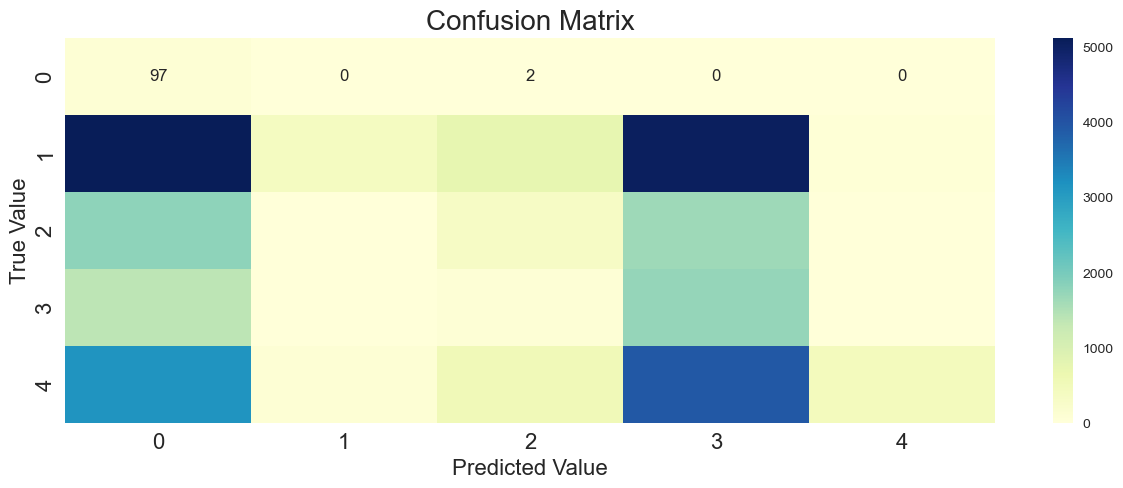

In [301]:
validate_result(y_cv,clf.predict(X_cv.toarray()),clf.predict_proba(X_cv.toarray()),model="GaussianNB")


In [302]:
y_cv
y_pred = clf.predict(X_cv.toarray())
# clf.predict_proba(X_cv.toarray())
model="GaussianNB"


In [303]:
y_pred

array([1., 1., 1., ..., 4., 4., 1.])

The Result for the GaussianNB Classification is a Below



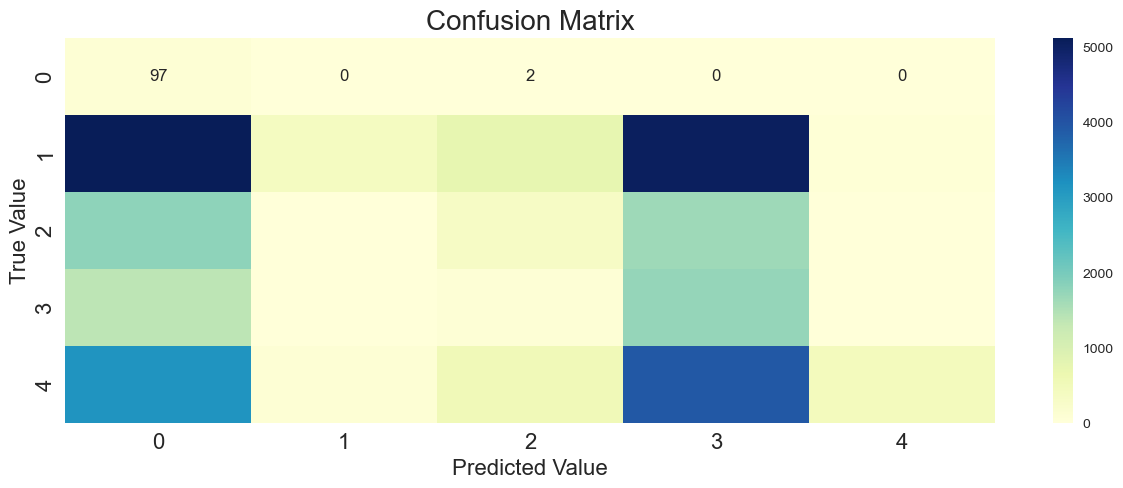

In [306]:
print(f"The Result for the {model} Classification is a Below\n")
fig, ax = plt.subplots(figsize=(15,5))

conf = confusion_matrix(y_cv, y_pred).round(3)


In [350]:
from enhanced_confusion_matrix import plot_enhanced_confusion_matrix



# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


NameError: name 'fig' is not defined

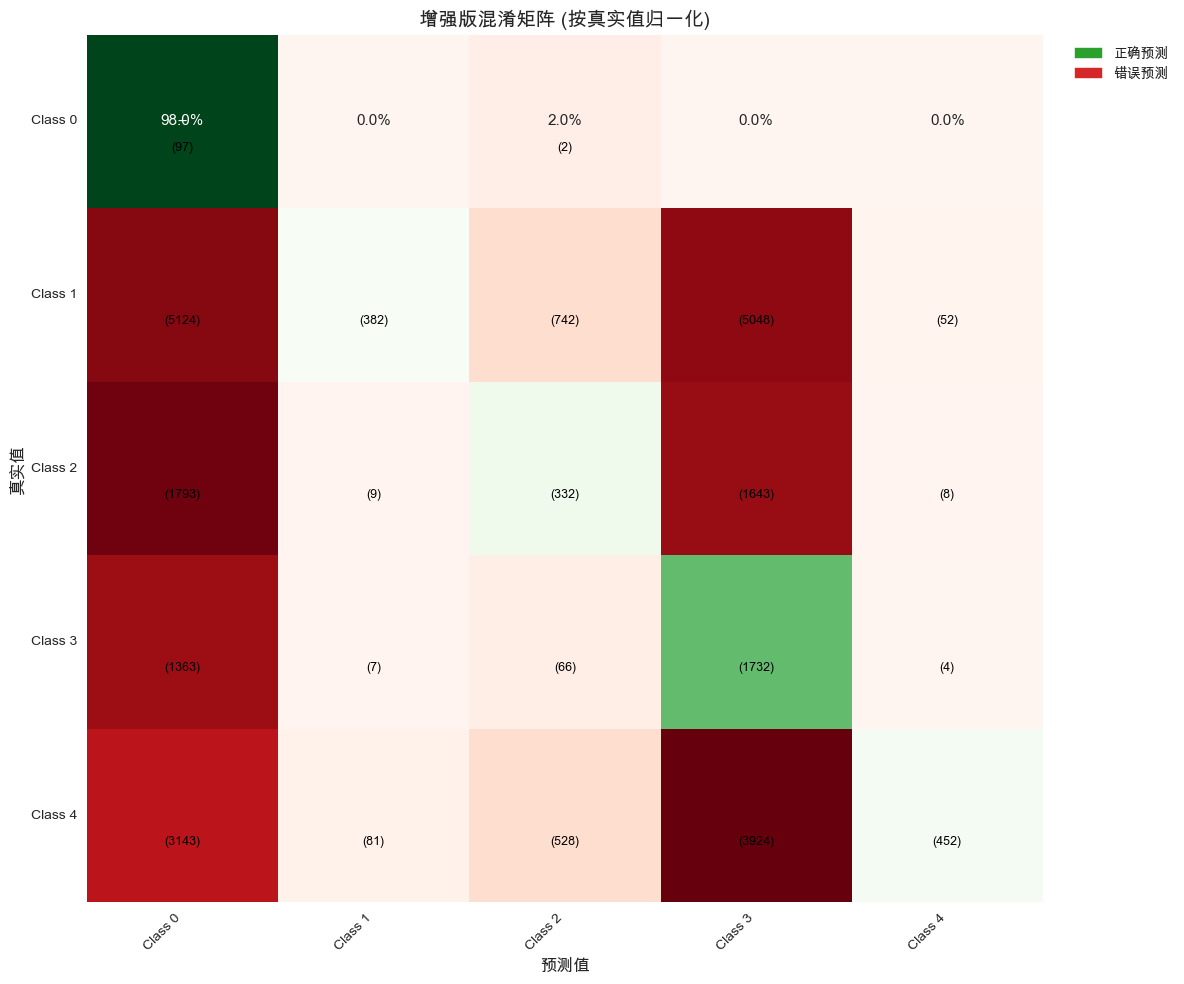

In [351]:
# 使用增强版
fig = plot_enhanced_confusion_matrix(y_cv, y_pred,  style='detailed')
plt.show()

In [312]:
conf
# plot.plot_point(y_cv, y_pred, model)

array([[  97,    0,    2,    0,    0],
       [5124,  382,  742, 5048,   52],
       [1793,    9,  332, 1643,    8],
       [1363,    7,   66, 1732,    4],
       [3143,   81,  528, 3924,  452]])

In [352]:

b = sns.heatmap(conf.round(3), cmap="YlGnBu",annot=True,ax = ax)

b.axes.set_title("Confusion Matrix",fontsize=20)

b.set_xlabel("Predicted Value",fontsize=16)

b.set_ylabel("True Value",fontsize=16)

b.tick_params(labelsize=16)

# 逻辑回归

In [383]:
#  This function will provide result to oour classification model
def validate_result(y_true, y_pred,y_prob,model="Model"):
    print(f"The Result for the {model} Classification is Below\n")
    fig, ax = plt.subplots(figsize=(15,5))
    conf = confusion_matrix(y_true, y_pred).round(3)
    b = sns.heatmap(conf.round(3), cmap="YlGnBu",annot=True,ax = ax)
    b.axes.set_title("Confusion Matrix",fontsize=20)
    b.set_xlabel("Predicted Value",fontsize=16)
    b.set_ylabel("True Value",fontsize=16)
    b.tick_params(labelsize=16)
    
    print("=="*50)
    print(f"Recall Score: {(recall_score(y_true, y_pred,average='weighted')*100).round(3)} %")
    print(f"Precision Score: {(precision_score(y_true, y_pred,average='weighted')*100).round(3)} %")
    print("F1 Score: ",f1_score(y_true, y_pred,average='weighted').round(3))
    print("Log Loss: ",log_loss(y_true, y_prob).round(3))
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    print("Classification Report:\n",df.round(3))

## Logistic Regression with SGDClassifier

In [353]:
param = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],'penalty': ['l2','l1']}

log_rand = RandomizedSearchCV(SGDClassifier(loss='log',early_stopping=True),param,
                              verbose=50,return_train_score=True,scoring='f1_macro',cv=5,n_jobs=3)
log_rand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


23231.24s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
23231.26s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
23231.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the de

[CV 3/5; 1/10] START alpha=0.1, penalty=l1......................................
[CV 1/5; 1/10] START alpha=0.1, penalty=l1......................................
[CV 2/5; 1/10] START alpha=0.1, penalty=l1......................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5; 1/10] END alpha=0.1, penalty=l1;, score=(train=0.246, test=0.248) total time=   0.3s
[CV 2/5; 1/10] END alpha=0.1, penalty=l1;, score=(train=0.247, test=0.246) total time=   0.3s
[CV 3/5; 1/10] END alpha=0.1, penalty=l1;, score=(train=0.248, test=0.246) total time=   0.3s
[CV 5/5; 1/10] START alpha=0.1, penalty=l1......................................
[CV 4/5; 1/10] START alpha=0.1, penalty=l1......................................
[CV 1/5; 2/10] START alpha=10.0, penalty=l2.....................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5; 2/10] END alpha=10.0, penalty=l2;, score=(train=0.164, test=0.163) total time=   0.2s
[CV 2/5; 2/10] START alpha=10.0, penalty=l2.....................................
[CV 4/5; 1/10] END alpha=0.1, penalty=l1;, score=(train=0.247, test=0.245) total time=   0.3s
[CV 3/5; 2/10] START alpha=10.0, penalty=l2.....................................
[CV 5/5; 1/10] END alpha=0.1, penalty=l1;, score=(train=0.245, test=0.248) total time=   0.3s
[CV 4/5; 2/10] START alpha=10.0, penalty=l2.....................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 2/5; 2/10] END alpha=10.0, penalty=l2;, score=(train=0.168, test=0.169) total time=   0.2s
[CV 5/5; 2/10] START alpha=10.0, penalty=l2.....................................
[CV 3/5; 2/10] END alpha=10.0, penalty=l2;, score=(train=0.167, test=0.164) total time=   0.2s
[CV 1/5; 3/10] START alpha=100.0, penalty=l1....................................
[CV 4/5; 2/10] END alpha=10.0, penalty=l2;, score=(train=0.167, test=0.166) total time=   0.2s
[CV 2/5; 3/10] START alpha=100.0, penalty=l1....................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 5/5; 2/10] END alpha=10.0, penalty=l2;, score=(train=0.165, test=0.168) total time=   0.2s
[CV 3/5; 3/10] START alpha=100.0, penalty=l1....................................
[CV 1/5; 3/10] END alpha=100.0, penalty=l1;, score=(train=0.121, test=0.121) total time=   0.3s
[CV 4/5; 3/10] START alpha=100.0, penalty=l1....................................
[CV 2/5; 3/10] END alpha=100.0, penalty=l1;, score=(train=0.121, test=0.121) total time=   0.3s
[CV 5/5; 3/10] START alpha=100.0, penalty=l1....................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 3/5; 3/10] END alpha=100.0, penalty=l1;, score=(train=0.121, test=0.121) total time=   0.3s
[CV 1/5; 4/10] START alpha=1000.0, penalty=l2...................................
[CV 4/5; 3/10] END alpha=100.0, penalty=l1;, score=(train=0.121, test=0.121) total time=   0.3s
[CV 2/5; 4/10] START alpha=1000.0, penalty=l2...................................
[CV 5/5; 3/10] END alpha=100.0, penalty=l1;, score=(train=0.121, test=0.121) total time=   0.3s
[CV 3/5; 4/10] START alpha=1000.0, penalty=l2...................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5; 4/10] END alpha=1000.0, penalty=l2;, score=(train=0.125, test=0.126) total time=   0.3s
[CV 4/5; 4/10] START alpha=1000.0, penalty=l2...................................
[CV 2/5; 4/10] END alpha=1000.0, penalty=l2;, score=(train=0.152, test=0.154) total time=   0.3s
[CV 5/5; 4/10] START alpha=1000.0, penalty=l2...................................
[CV 3/5; 4/10] END alpha=1000.0, penalty=l2;, score=(train=0.155, test=0.151) total time=   0.3s
[CV 1/5; 5/10] START alpha=100.0, penalty=l2....................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 4/5; 4/10] END alpha=1000.0, penalty=l2;, score=(train=0.267, test=0.266) total time=   0.2s
[CV 2/5; 5/10] START alpha=100.0, penalty=l2....................................
[CV 5/5; 4/10] END alpha=1000.0, penalty=l2;, score=(train=0.265, test=0.266) total time=   0.2s
[CV 3/5; 5/10] START alpha=100.0, penalty=l2....................................
[CV 1/5; 5/10] END alpha=100.0, penalty=l2;, score=(train=0.145, test=0.144) total time=   0.2s
[CV 4/5; 5/10] START alpha=100.0, penalty=l2....................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 2/5; 5/10] END alpha=100.0, penalty=l2;, score=(train=0.154, test=0.156) total time=   0.3s
[CV 5/5; 5/10] START alpha=100.0, penalty=l2....................................
[CV 3/5; 5/10] END alpha=100.0, penalty=l2;, score=(train=0.146, test=0.143) total time=   0.2s
[CV 1/5; 6/10] START alpha=1.0, penalty=l1......................................
[CV 4/5; 5/10] END alpha=100.0, penalty=l2;, score=(train=0.154, test=0.154) total time=   0.2s
[CV 2/5; 6/10] START alpha=1.0, penalty=l1......................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 5/5; 5/10] END alpha=100.0, penalty=l2;, score=(train=0.154, test=0.156) total time=   0.2s
[CV 3/5; 6/10] START alpha=1.0, penalty=l1......................................
[CV 1/5; 6/10] END alpha=1.0, penalty=l1;, score=(train=0.121, test=0.121) total time=   0.3s
[CV 4/5; 6/10] START alpha=1.0, penalty=l1......................................
[CV 2/5; 6/10] END alpha=1.0, penalty=l1;, score=(train=0.121, test=0.121) total time=   0.3s
[CV 5/5; 6/10] START alpha=1.0, penalty=l1......................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 3/5; 6/10] END alpha=1.0, penalty=l1;, score=(train=0.121, test=0.121) total time=   0.3s
[CV 1/5; 7/10] START alpha=0.01, penalty=l1.....................................
[CV 4/5; 6/10] END alpha=1.0, penalty=l1;, score=(train=0.121, test=0.121) total time=   0.3s
[CV 5/5; 6/10] END alpha=1.0, penalty=l1;, score=(train=0.121, test=0.121) total time=   0.3s
[CV 2/5; 7/10] START alpha=0.01, penalty=l1.....................................
[CV 3/5; 7/10] START alpha=0.01, penalty=l1.....................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5; 7/10] END alpha=0.01, penalty=l1;, score=(train=0.297, test=0.299) total time=   0.3s
[CV 4/5; 7/10] START alpha=0.01, penalty=l1.....................................
[CV 2/5; 7/10] END alpha=0.01, penalty=l1;, score=(train=0.300, test=0.300) total time=   0.3s
[CV 5/5; 7/10] START alpha=0.01, penalty=l1.....................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 3/5; 7/10] END alpha=0.01, penalty=l1;, score=(train=0.299, test=0.298) total time=   0.4s
[CV 1/5; 8/10] START alpha=0.0001, penalty=l1...................................
[CV 4/5; 7/10] END alpha=0.01, penalty=l1;, score=(train=0.299, test=0.297) total time=   0.3s
[CV 2/5; 8/10] START alpha=0.0001, penalty=l1...................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 5/5; 7/10] END alpha=0.01, penalty=l1;, score=(train=0.296, test=0.300) total time=   0.3s
[CV 3/5; 8/10] START alpha=0.0001, penalty=l1...................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5; 8/10] END alpha=0.0001, penalty=l1;, score=(train=0.497, test=0.497) total time=   0.5s
[CV 4/5; 8/10] START alpha=0.0001, penalty=l1...................................
[CV 2/5; 8/10] END alpha=0.0001, penalty=l1;, score=(train=0.522, test=0.515) total time=   0.5s
[CV 5/5; 8/10] START alpha=0.0001, penalty=l1...................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 3/5; 8/10] END alpha=0.0001, penalty=l1;, score=(train=0.508, test=0.489) total time=   0.6s
[CV 1/5; 9/10] START alpha=0.1, penalty=l2......................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5; 9/10] END alpha=0.1, penalty=l2;, score=(train=0.277, test=0.280) total time=   0.2s
[CV 2/5; 9/10] START alpha=0.1, penalty=l2......................................
[CV 4/5; 8/10] END alpha=0.0001, penalty=l1;, score=(train=0.499, test=0.491) total time=   0.6s
[CV 3/5; 9/10] START alpha=0.1, penalty=l2......................................
[CV 5/5; 8/10] END alpha=0.0001, penalty=l1;, score=(train=0.499, test=0.501) total time=   0.5s
[CV 4/5; 9/10] START alpha=0.1, penalty=l2......................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 2/5; 9/10] END alpha=0.1, penalty=l2;, score=(train=0.278, test=0.278) total time=   0.2s
[CV 5/5; 9/10] START alpha=0.1, penalty=l2......................................
[CV 3/5; 9/10] END alpha=0.1, penalty=l2;, score=(train=0.278, test=0.274) total time=   0.2s
[CV 1/5; 10/10] START alpha=0.0001, penalty=l2..................................
[CV 4/5; 9/10] END alpha=0.1, penalty=l2;, score=(train=0.277, test=0.276) total time=   0.2s
[CV 2/5; 10/10] START alpha=0.0001, penalty=l2..................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 5/5; 9/10] END alpha=0.1, penalty=l2;, score=(train=0.277, test=0.279) total time=   0.3s
[CV 3/5; 10/10] START alpha=0.0001, penalty=l2..................................
[CV 2/5; 10/10] END alpha=0.0001, penalty=l2;, score=(train=0.491, test=0.495) total time=   0.3s
[CV 4/5; 10/10] START alpha=0.0001, penalty=l2..................................


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5; 10/10] END alpha=0.0001, penalty=l2;, score=(train=0.519, test=0.518) total time=   0.4s
[CV 5/5; 10/10] START alpha=0.0001, penalty=l2..................................
[CV 3/5; 10/10] END alpha=0.0001, penalty=l2;, score=(train=0.486, test=0.463) total time=   0.4s


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 4/5; 10/10] END alpha=0.0001, penalty=l2;, score=(train=0.524, test=0.494) total time=   0.4s
[CV 5/5; 10/10] END alpha=0.0001, penalty=l2;, score=(train=0.491, test=0.486) total time=   0.3s


RandomizedSearchCV(cv=5,
                   estimator=SGDClassifier(early_stopping=True, loss='log'),
                   n_jobs=3,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0,
                                                  10.0, 100.0, 1000.0],
                                        'penalty': ['l2', 'l1']},
                   return_train_score=True, scoring='f1_macro', verbose=50)

In [205]:
log_rand.best_score_


0.4558314958918662

In [207]:
log_rand.best_estimator_
log_rand.best_params_


{'penalty': 'l2', 'alpha': 0.0001}

In [354]:
clf = SGDClassifier(early_stopping=True, loss='log', penalty='l1')
clf.fit(X_train,y_train)

SGDClassifier(early_stopping=True, loss='log', penalty='l1')

In [ ]:
y_cv
clf.predict(X_cv)
clf.predict_proba(X_cv)

The Result for the Logistic Regression with SGD Classification is a Below

Recall Score: 69.346 %
Precision Score: 68.035 %
F1 Score:  0.677
Log Loss:  0.817
Classification Report:
               precision  recall  f1-score    support
1.0               0.522   0.121     0.197     99.000
2.0               0.730   0.868     0.793  11348.000
3.0               0.517   0.384     0.441   3785.000
4.0               0.638   0.347     0.449   3172.000
5.0               0.706   0.735     0.720   8128.000
accuracy          0.693   0.693     0.693      0.693
macro avg         0.622   0.491     0.520  26532.000
weighted avg      0.680   0.693     0.677  26532.000


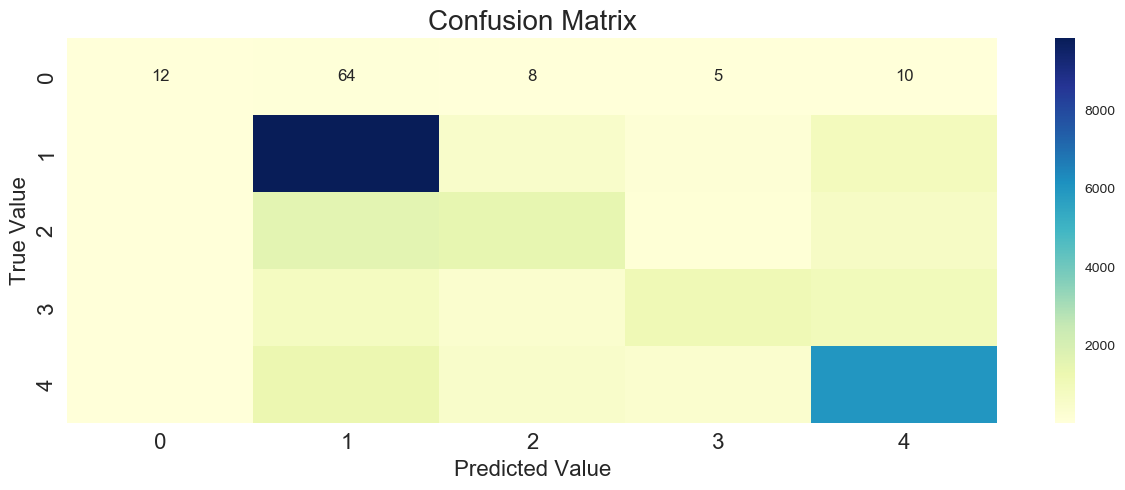

In [355]:
validate_result(y_cv,clf.predict(X_cv),clf.predict_proba(X_cv),model = "Logistic Regression with SGD")


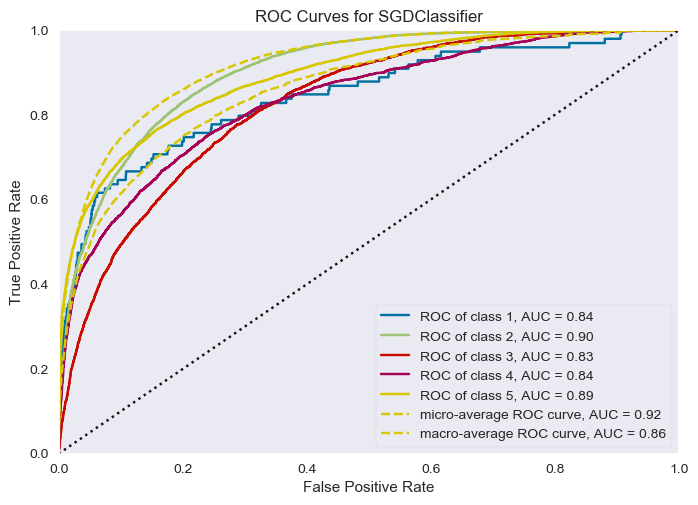

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for SGDClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=[1, 2, 3, 4, 5],
       estimator=SGDClassifier(early_stopping=True, loss='log', penalty='l1'))

In [356]:
roc_auc(clf,X_train,y_train,X_test = X_cv, y_test = y_cv,classes=[1,2,3,4,5])


NameError: name 'fig' is not defined

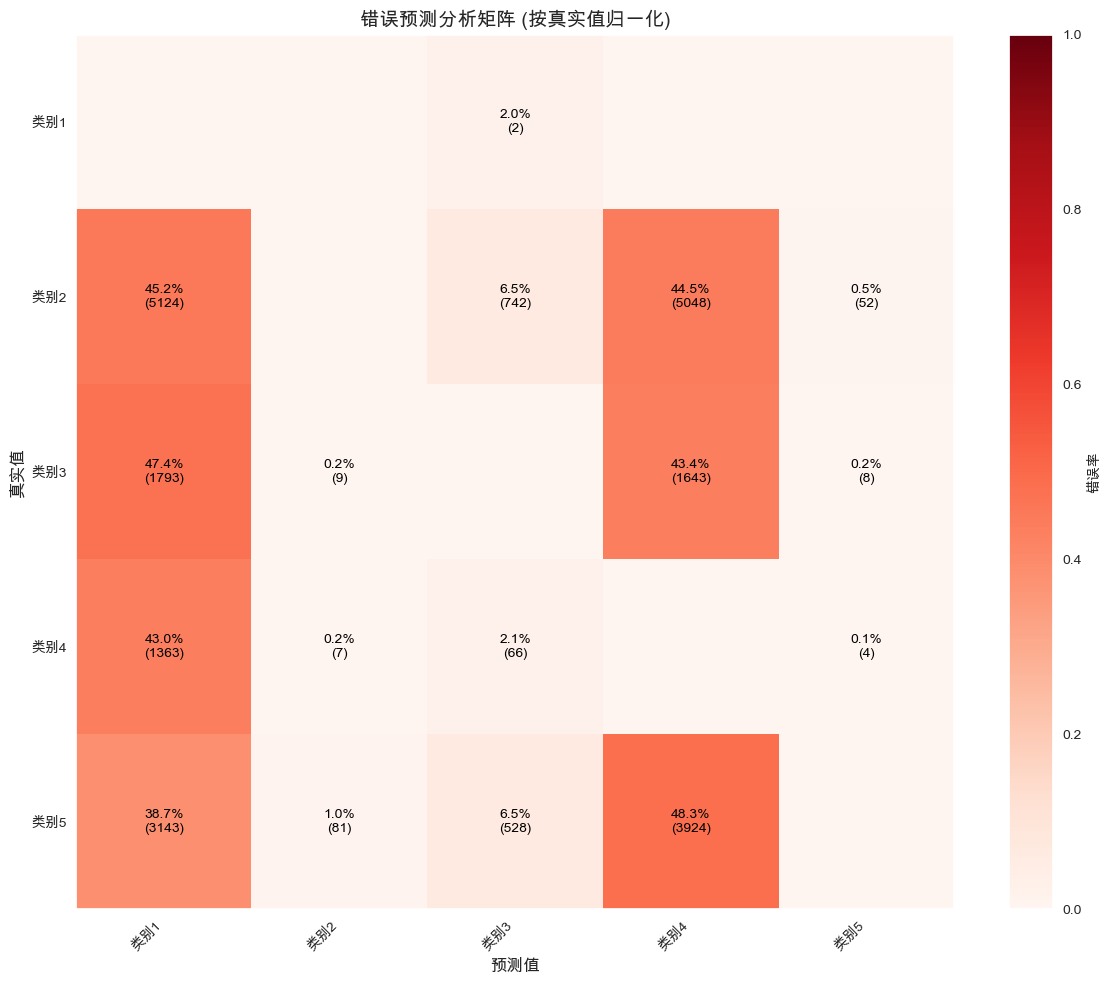

In [357]:
# 使用增强版
fig = plot_enhanced_confusion_matrix(y_cv, y_pred, 
                                   class_names=['类别1', '类别2', '类别3', '类别4', '类别5'],
                                   style='error-focused')
plt.show()

# 支持向量机
## SVM with SGDClassifier¶

In [374]:
param = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],'penalty': ['l2','l1']}

svm_rand = RandomizedSearchCV(SGDClassifier(loss='hinge',early_stopping=True,n_iter_no_change=50),param,
                              verbose=50,return_train_score=True,scoring='f1_macro',cv=5,n_jobs=3)
svm_rand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


49493.48s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
49493.48s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
49493.48s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - to python to disable frozen modules.


[CV 2/5; 1/10] START alpha=1.0, penalty=l1......................................
[CV 3/5; 1/10] START alpha=1.0, penalty=l1......................................
[CV 1/5; 1/10] START alpha=1.0, penalty=l1......................................
[CV 2/5; 1/10] END alpha=1.0, penalty=l1;, score=(train=0.121, test=0.121) total time=   2.2s
[CV 3/5; 1/10] END alpha=1.0, penalty=l1;, score=(train=0.121, test=0.121) total time=   2.2s
[CV 1/5; 1/10] END alpha=1.0, penalty=l1;, score=(train=0.121, test=0.121) total time=   2.2s
[CV 5/5; 1/10] START alpha=1.0, penalty=l1......................................
[CV 4/5; 1/10] START alpha=1.0, penalty=l1......................................
[CV 1/5; 2/10] START alpha=0.1, penalty=l1......................................
[CV 1/5; 2/10] END alpha=0.1, penalty=l1;, score=(train=0.273, test=0.274) total time=   2.4s
[CV 2/5; 2/10] START alpha=0.1, penalty=l1......................................
[CV 4/5; 1/10] END alpha=1.0, penalty=l1;, score=(train=0

RandomizedSearchCV(cv=5,
                   estimator=SGDClassifier(early_stopping=True,
                                           n_iter_no_change=50),
                   n_jobs=3,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0,
                                                  10.0, 100.0, 1000.0],
                                        'penalty': ['l2', 'l1']},
                   return_train_score=True, scoring='f1_macro', verbose=50)

In [375]:
svm_rand.best_score_


0.49271635900409183

In [376]:
svm_rand.best_params_


{'penalty': 'l2', 'alpha': 0.0001}

In [377]:
clf = SGDClassifier(early_stopping=True, n_iter_no_change=50)
clf.fit(X_train,y_train)

SGDClassifier(early_stopping=True, n_iter_no_change=50)

The Result for the SVM with SGD Classification is Below

Recall Score: 69.388 %
Precision Score: 67.872 %
F1 Score:  0.672
Log Loss:  4.654
Classification Report:
               precision  recall  f1-score    support
1.0               0.324   0.121     0.176     99.000
2.0               0.715   0.900     0.797  11348.000
3.0               0.581   0.278     0.376   3785.000
4.0               0.593   0.418     0.490   3172.000
5.0               0.711   0.715     0.713   8128.000
accuracy          0.694   0.694     0.694      0.694
macro avg         0.585   0.486     0.511  26532.000
weighted avg      0.679   0.694     0.672  26532.000


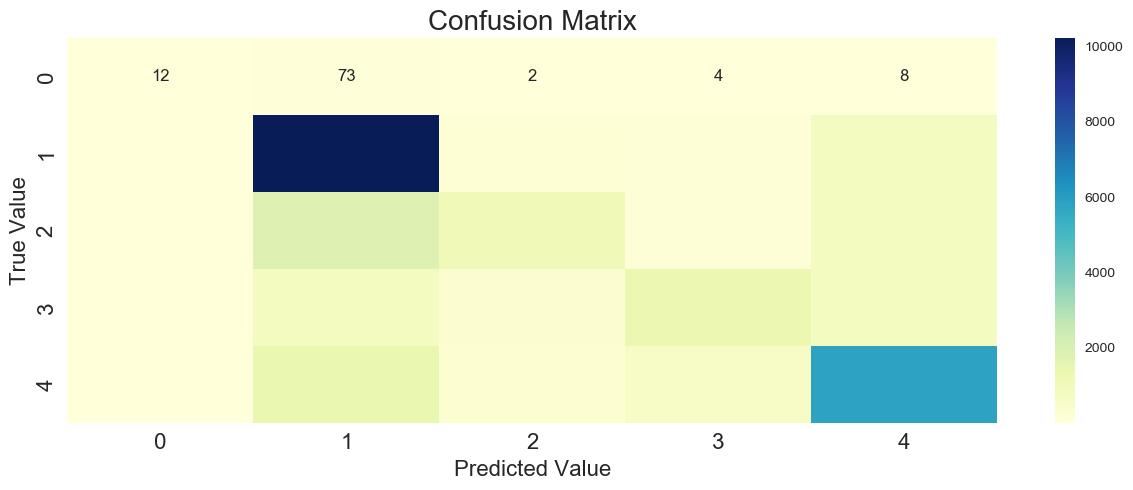

In [384]:
y_prob = clf.decision_function(X_cv) if hasattr(clf, "decision_function") else None
y_pred = clf.predict(X_cv)

validate_result(y_cv,y_pred,y_prob,model = "SVM with SGD")

NameError: name 'fig' is not defined

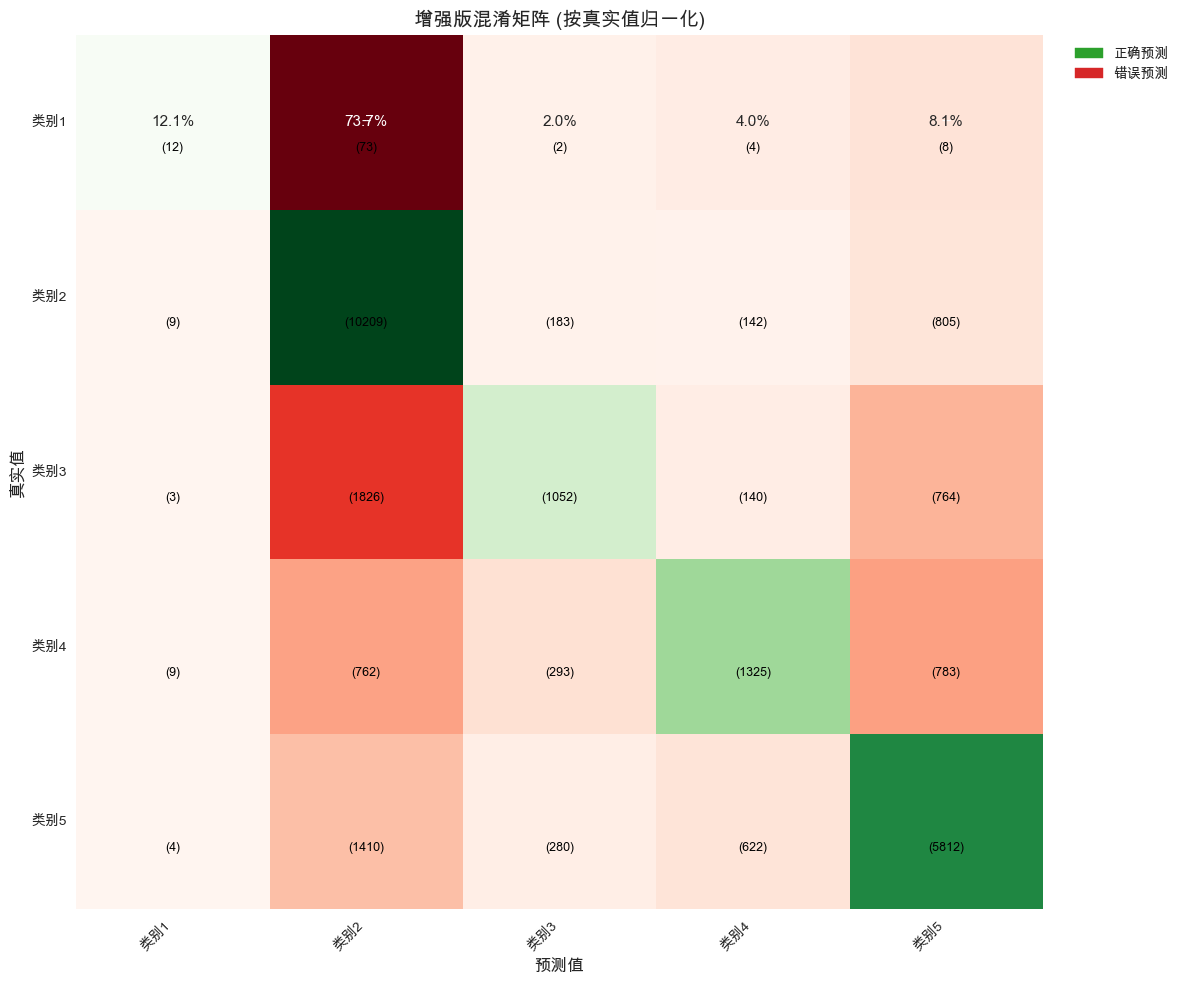

In [385]:
# 使用增强版
fig = plot_enhanced_confusion_matrix(y_cv, y_pred, 
                                   class_names=['类别1', '类别2', '类别3', '类别4', '类别5'],
                                   style='detailed')
plt.show()

NameError: name 'fig' is not defined

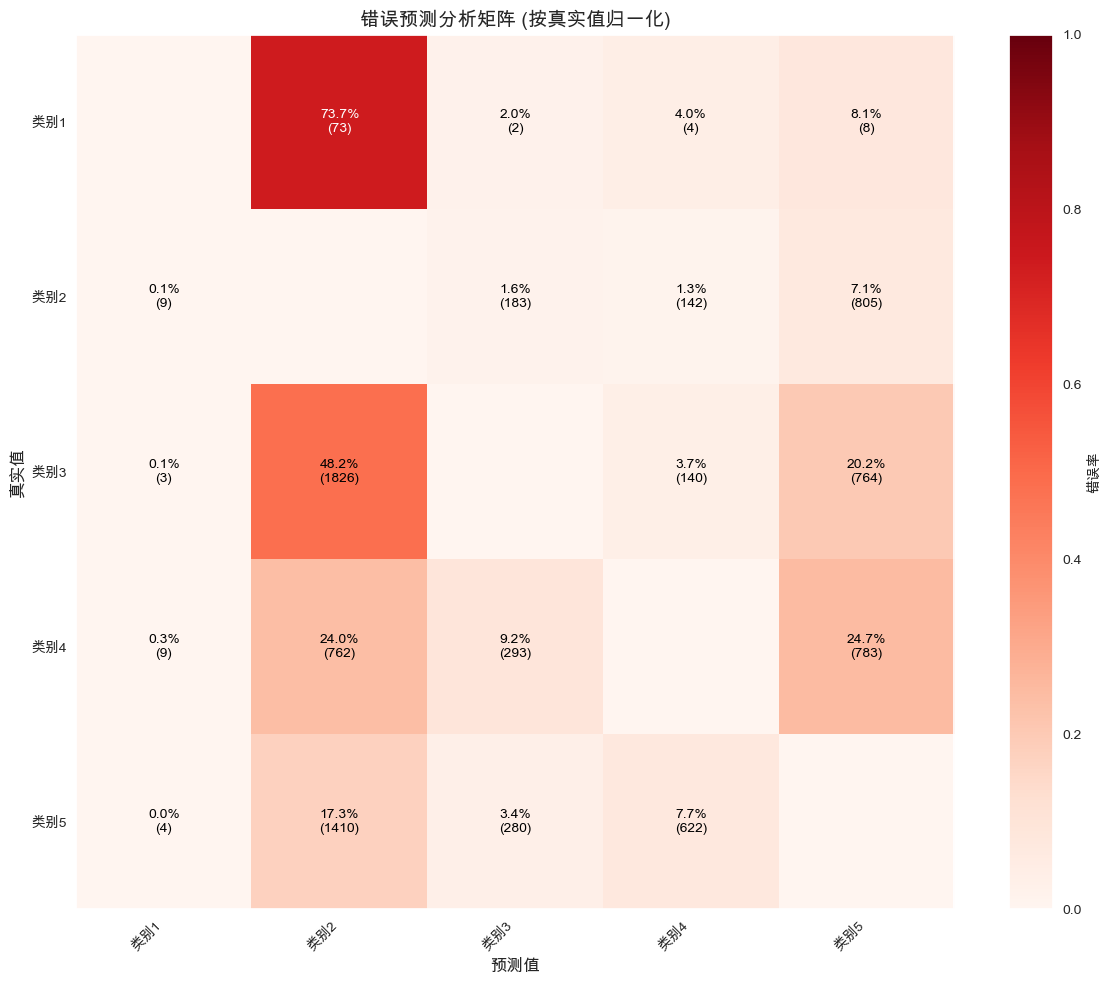

In [382]:
# 使用增强版
fig = plot_enhanced_confusion_matrix(y_cv, y_pred, 
                                   class_names=['类别1', '类别2', '类别3', '类别4', '类别5'],
                                   style='error-focused')
plt.show()

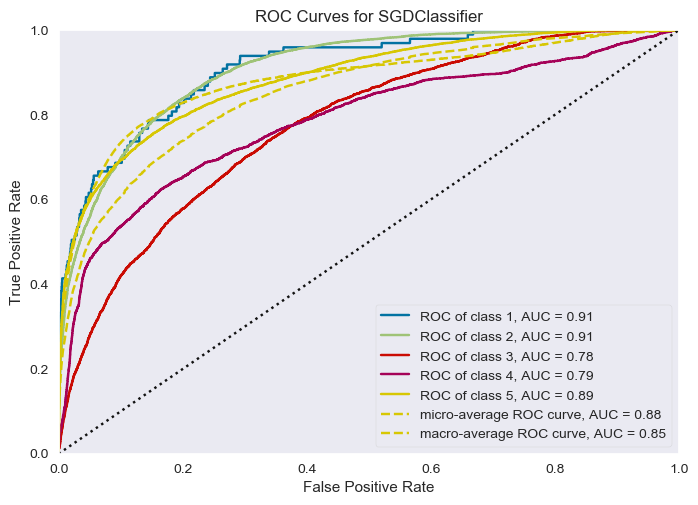

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for SGDClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=[1, 2, 3, 4, 5],
       estimator=SGDClassifier(early_stopping=True, n_iter_no_change=50))

In [379]:
roc_auc(clf,X_train,y_train,X_test = X_cv, y_test = y_cv,classes=[1,2,3,4,5])


# 随机森林
## Random Forest¶


In [386]:
params = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
          "min_samples_leaf": [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
rf_rand = RandomizedSearchCV(RandomForestClassifier(),params,
                              verbose=8,return_train_score=True,scoring='f1_weighted',cv=5,n_jobs=5)
rf_rand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


49959.52s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
49959.52s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
49959.52s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
49959.52s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
49959.53s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - to python to disable frozen modules.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - Debugger warning: It seems that frozen modules are being used, whi

[CV 4/5] END max_depth=4, min_samples_leaf=13;, score=(train=0.489, test=0.486) total time=   0.9s
[CV 5/5] END max_depth=4, min_samples_leaf=13;, score=(train=0.475, test=0.479) total time=   0.9s
[CV 2/5] END max_depth=4, min_samples_leaf=13;, score=(train=0.484, test=0.483) total time=   1.0s
[CV 1/5] END max_depth=4, min_samples_leaf=13;, score=(train=0.474, test=0.473) total time=   1.0s
[CV 3/5] END max_depth=4, min_samples_leaf=13;, score=(train=0.491, test=0.488) total time=   1.0s
[CV 4/5] END max_depth=12, min_samples_leaf=6;, score=(train=0.588, test=0.579) total time=   2.5s
[CV 2/5] END max_depth=12, min_samples_leaf=6;, score=(train=0.588, test=0.586) total time=   2.5s
[CV 1/5] END max_depth=12, min_samples_leaf=6;, score=(train=0.604, test=0.600) total time=   2.6s
[CV 3/5] END max_depth=12, min_samples_leaf=6;, score=(train=0.593, test=0.583) total time=   2.5s
[CV 5/5] END max_depth=12, min_samples_leaf=6;, score=(train=0.584, test=0.581) total time=   2.6s
[CV 1/5] E

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=5,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9, 10, 11, 12, 13,
                                                             14]},
                   return_train_score=True, scoring='f1_weighted', verbose=8)

In [387]:
rf_rand.best_score_


0.5858341942976255

In [388]:
rf_rand.best_estimator_


RandomForestClassifier(max_depth=12, min_samples_leaf=6)

In [389]:
clf = RandomForestClassifier(max_depth=14, min_samples_leaf=6,n_jobs=5)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=14, min_samples_leaf=6, n_jobs=5)

The Result for the Random Forest Classification is Below

Recall Score: 66.339 %
Precision Score: 68.524 %
F1 Score:  0.614
Log Loss:  0.897
Classification Report:
               precision  recall  f1-score    support
1.0               0.000   0.000     0.000     99.000
2.0               0.644   0.933     0.762  11348.000
3.0               0.718   0.181     0.289   3785.000
4.0               0.820   0.161     0.269   3172.000
5.0               0.684   0.715     0.699   8128.000
accuracy          0.663   0.663     0.663      0.663
macro avg         0.573   0.398     0.404  26532.000
weighted avg      0.685   0.663     0.614  26532.000


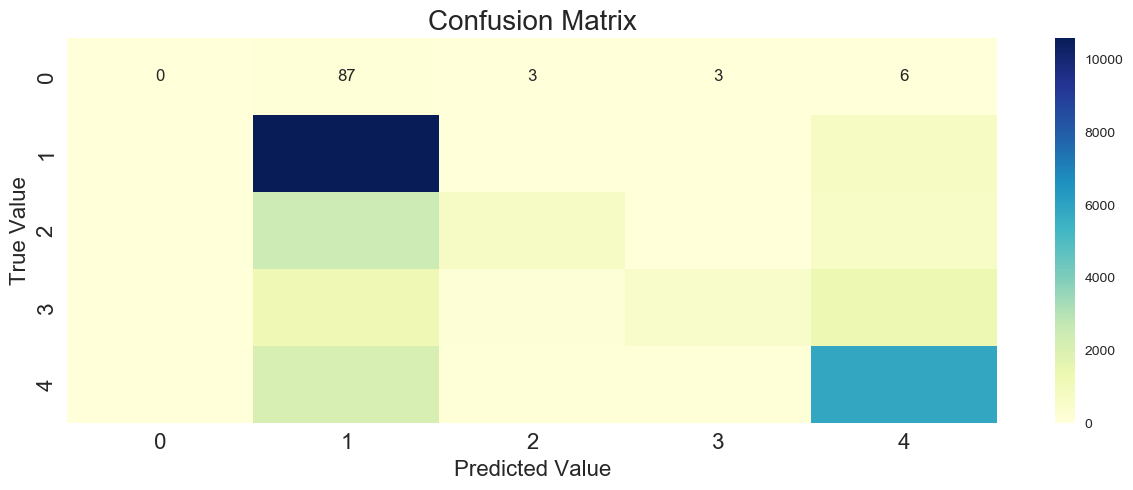

In [390]:
y_pred = clf.predict(X_cv)
validate_result(y_cv,y_pred,clf.predict_proba(X_cv),model = "Random Forest")


NameError: name 'fig' is not defined

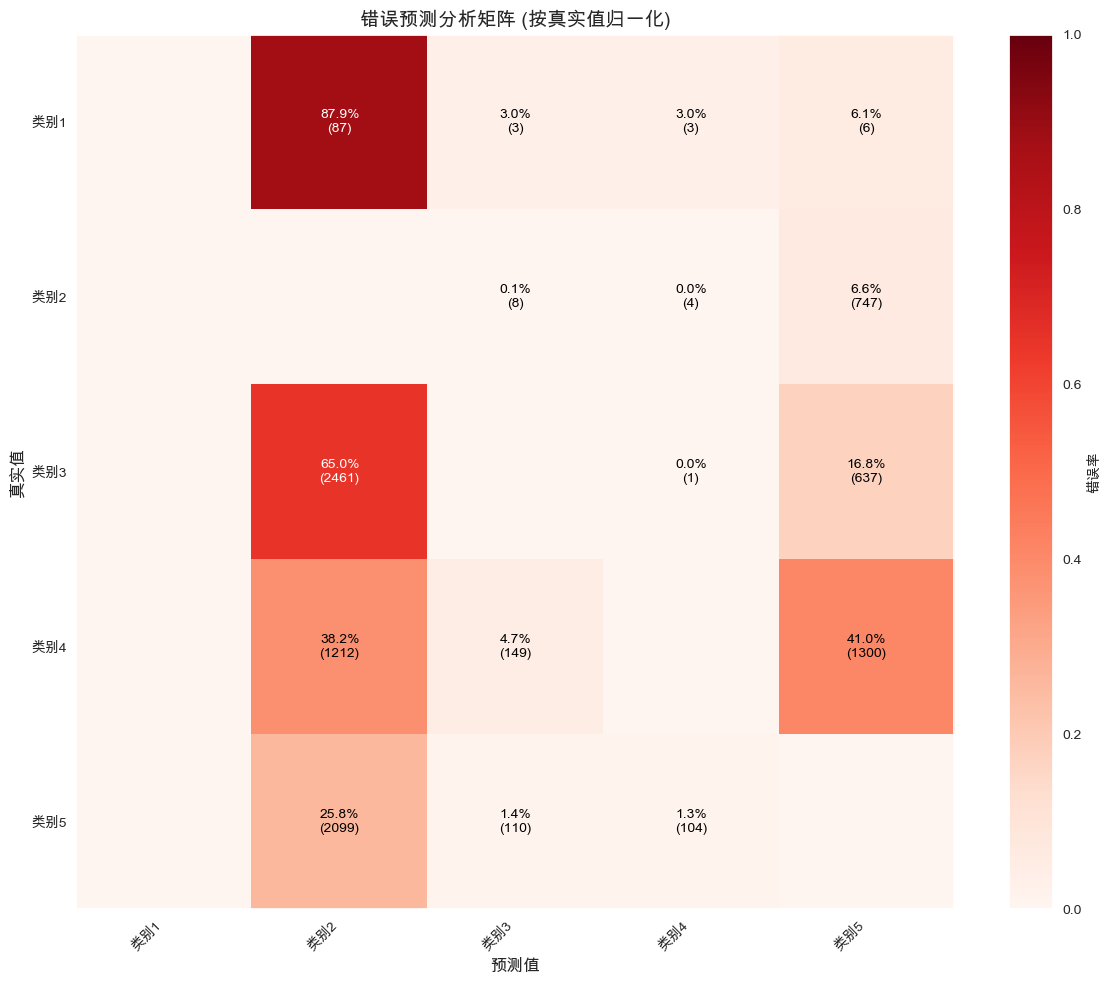

In [392]:
# 使用增强版
fig = plot_enhanced_confusion_matrix(y_cv, y_pred, 
                                   class_names=['类别1', '类别2', '类别3', '类别4', '类别5'],
                                   style='error-focused')
plt.show()

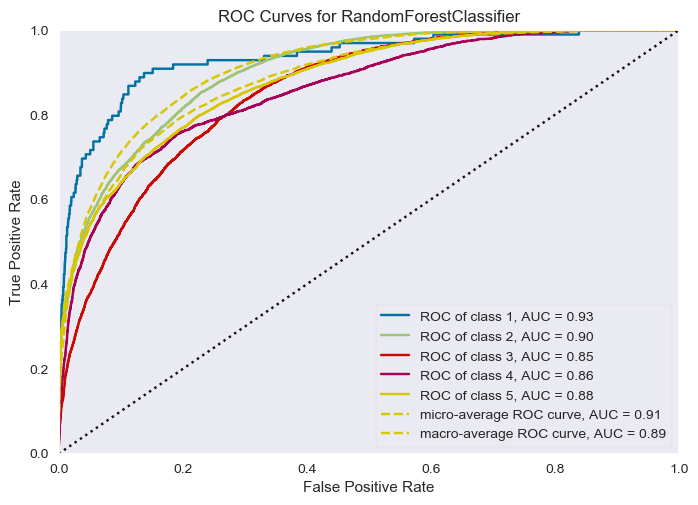

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=[1, 2, 3, 4, 5],
       estimator=RandomForestClassifier(max_depth=14, min_samples_leaf=6,
                                        n_jobs=5))

In [391]:
roc_auc(clf,X_train,y_train,X_test = X_cv, y_test = y_cv,classes=[1,2,3,4,5])


# XGBoost Classifier

In [393]:
# Convert labels to integers
# Adjust labels to start from 0
y_train_adjusted = y_train - 1
y_cv_adjusted = y_cv - 1
# Parameters for RandomizedSearchCV
params = {
    "learning_rate": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100],
    'subsample': [0.6, 0.7, 0.8, 0.9]
}

# Initialize RandomizedSearchCV with XGBClassifier
xgb_rand = RandomizedSearchCV(
    XGBClassifier(),
    params,
    verbose=100,
    return_train_score=True,
    scoring='f1_weighted',
    cv=5,
    n_jobs=5
)

xgb_rand.fit(X_train, y_train_adjusted)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START colsample_bytree=0.9, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=5, reg_alpha=1e-05, subsample=0.8
[CV 2/5; 1/10] START colsample_bytree=0.9, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=5, reg_alpha=1e-05, subsample=0.8
[CV 4/5; 1/10] START colsample_bytree=0.9, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=5, reg_alpha=1e-05, subsample=0.8
[CV 3/5; 1/10] START colsample_bytree=0.9, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=5, reg_alpha=1e-05, subsample=0.8
[CV 5/5; 1/10] START colsample_bytree=0.9, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=5, reg_alpha=1e-05, subsample=0.8
[CV 1/5; 1/10] END colsample_bytree=0.9, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=5, reg_alpha=1e-05, subsample=0.8;, score=(train=0.688, test=0.675) total time=   2.1s
[CV 1/5; 2/10] START colsample_bytree=0.9, gamma=5, learning_rate=0.001,

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           num_parallel_tree=None, ...),
                   n_jobs=5,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [1e-05, 0.0001, 0.001,
                                                          0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 100],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   return_train_score=True, scoring='f1_weighted', verbose=100)

In [ ]:
xgb_rand.best_estimator_


In [394]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=8,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=None, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)
clf.fit(X_train,y_train_adjusted)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.1, gpu_id=-1, grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.0001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=8, max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints='()', multi_strategy=None, n_estimators=100,
              n_jobs=0, ...)

The Result for the XGBClassifier Classification is Below

Recall Score: 3.46 %
Precision Score: 2.08 %
F1 Score:  0.02
Log Loss:  1.6
Classification Report:
               precision  recall  f1-score    support
1.0               0.005   0.808     0.010     99.000
2.0               0.017   0.002     0.004  11348.000
3.0               0.005   0.002     0.003   3785.000
4.0               0.105   0.254     0.149   3172.000
5.0               0.000   0.000     0.000   8128.000
accuracy          0.035   0.035     0.035      0.035
macro avg         0.027   0.213     0.033  26532.000
weighted avg      0.021   0.035     0.020  26532.000


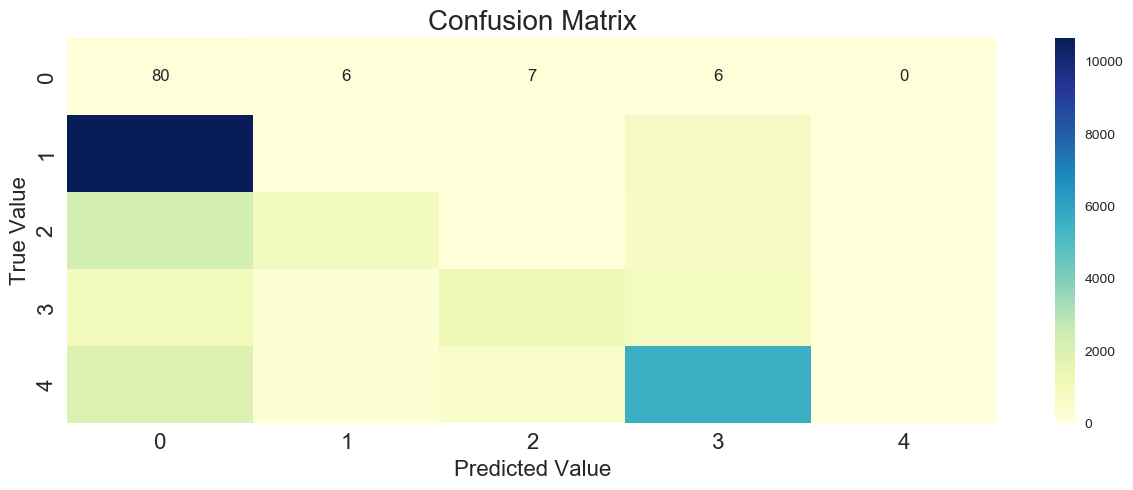

In [395]:
y_pred = clf.predict(X_cv)
validate_result(y_cv, y_pred, clf.predict_proba(X_cv),model="XGBClassifier")


NameError: name 'fig' is not defined

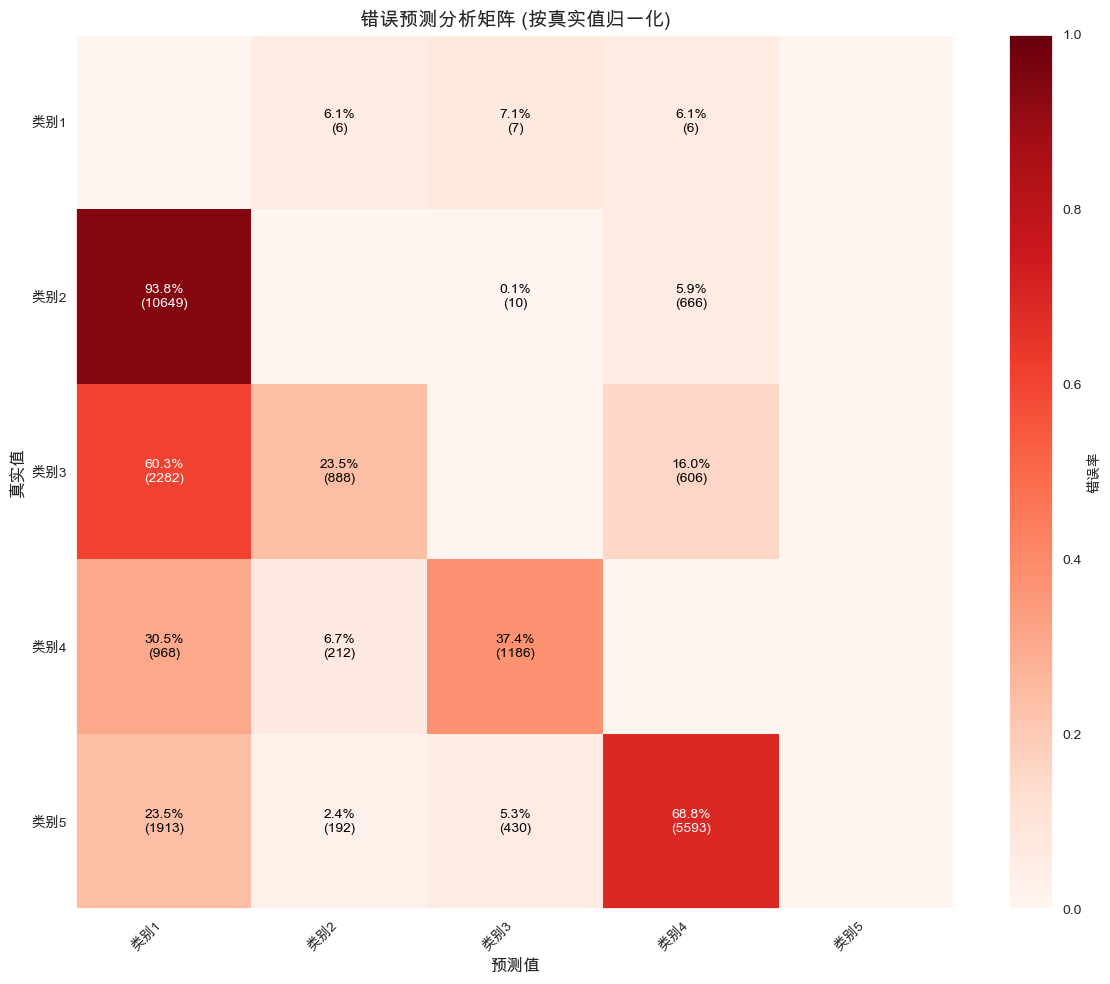

In [396]:
# 使用增强版
fig = plot_enhanced_confusion_matrix(y_cv, y_pred, 
                                   class_names=['类别1', '类别2', '类别3', '类别4', '类别5'],
                                   style='error-focused')
plt.show()

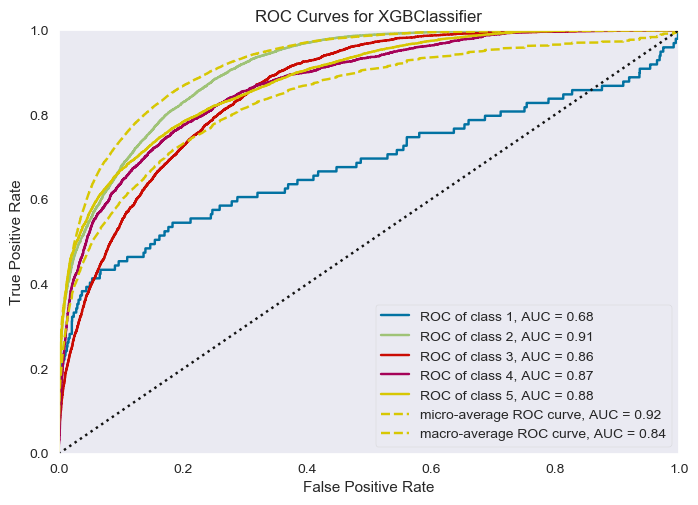

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=[1, 2, 3, 4, 5],
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               fea...pes=None, feature_weights=None,
                               gamma=0.1, gpu_id=-1, grow_policy=None,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.0001,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=0,
                               max_depth=8, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints='()',
                               multi_strategy=None, n_estimators=100, n_jobs=0, ...))

In [397]:
roc_auc(clf,X_train,y_train,X_test = X_cv, y_test = y_cv,classes=[1,2,3,4,5])


# 多层感知神经网络模型

In [399]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=200,learning_rate='adaptive',early_stopping=True,
                    validation_fraction=0.3,
                    n_iter_no_change=20,
                    verbose=True)
clf.fit(X_train,y_train)

Iteration 1, loss = 0.90965706
Validation score: 0.695792
Iteration 2, loss = 0.75504876
Validation score: 0.712809
Iteration 3, loss = 0.70650493
Validation score: 0.726733
Iteration 4, loss = 0.66438510
Validation score: 0.735025
Iteration 5, loss = 0.63102419
Validation score: 0.745978
Iteration 6, loss = 0.59950892
Validation score: 0.753713
Iteration 7, loss = 0.57110161
Validation score: 0.760644
Iteration 8, loss = 0.54485845
Validation score: 0.763181
Iteration 9, loss = 0.52052094
Validation score: 0.774443
Iteration 10, loss = 0.49870205
Validation score: 0.776671
Iteration 11, loss = 0.47787617
Validation score: 0.784592
Iteration 12, loss = 0.45890712
Validation score: 0.790656
Iteration 13, loss = 0.44131267
Validation score: 0.795606
Iteration 14, loss = 0.42510730
Validation score: 0.800433
Iteration 15, loss = 0.41018278
Validation score: 0.802104
Iteration 16, loss = 0.39734855
Validation score: 0.800309
Iteration 17, loss = 0.38472995
Validation score: 0.808911
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=200,
              learning_rate='adaptive', n_iter_no_change=20,
              validation_fraction=0.3, verbose=True)

The Result for the MLP Classification is Below

Recall Score: 86.525 %
Precision Score: 86.49 %
F1 Score:  0.865
Log Loss:  0.475
Classification Report:
               precision  recall  f1-score    support
1.0               0.762   0.575     0.656    106.000
2.0               0.885   0.912     0.898  17048.000
3.0               0.822   0.752     0.785   5835.000
4.0               0.792   0.828     0.809   4673.000
5.0               0.887   0.872     0.879  11937.000
accuracy          0.865   0.865     0.865      0.865
macro avg         0.830   0.788     0.806  39599.000
weighted avg      0.865   0.865     0.865  39599.000


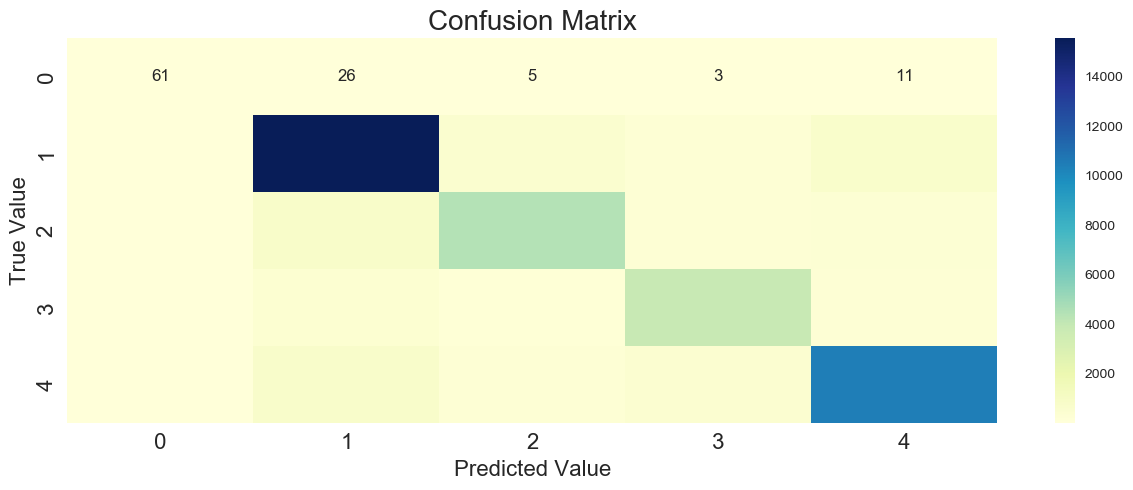

In [400]:
y_pred_test = clf.predict(X_test)
validate_result(y_test, y_pred_test, clf.predict_proba(X_test),model="MLP")


NameError: name 'fig' is not defined

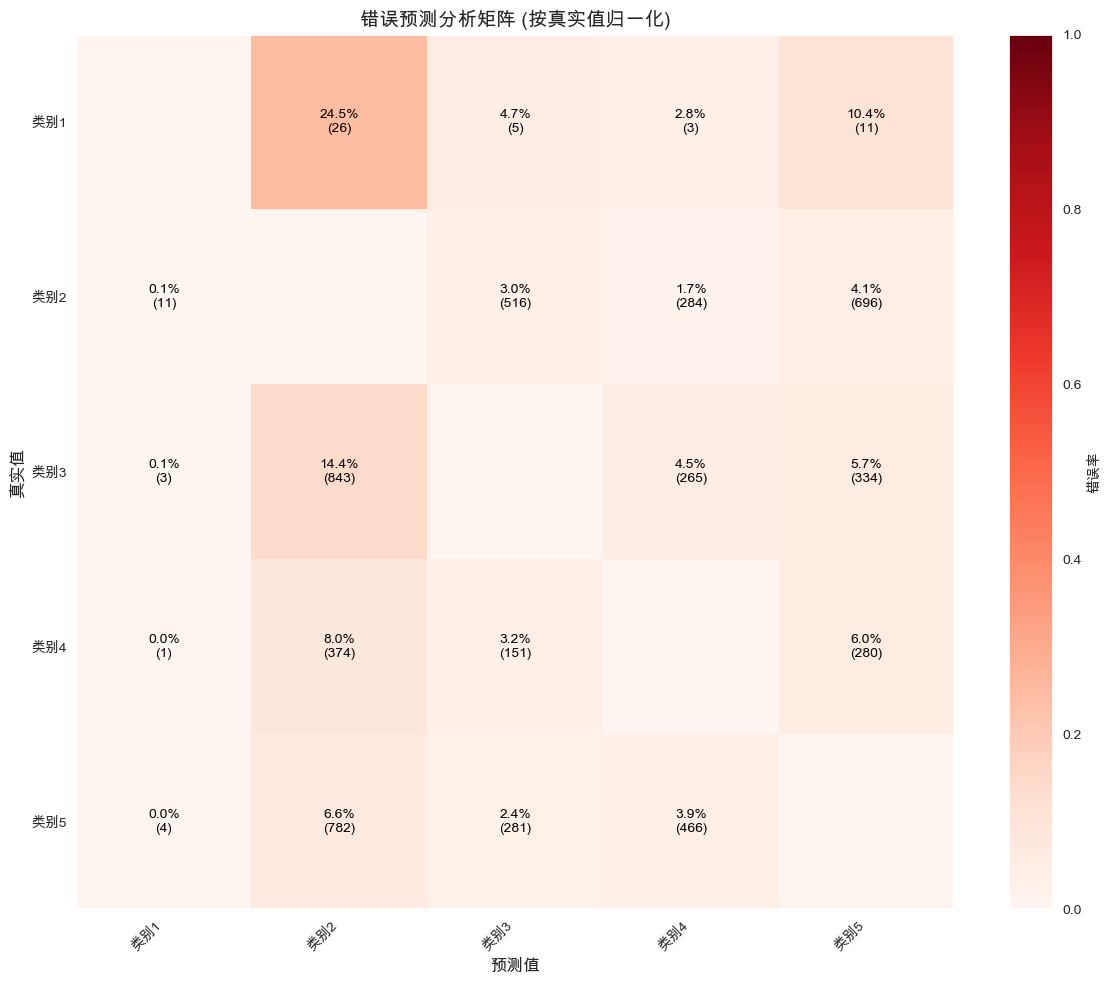

In [401]:
# 使用增强版
fig = plot_enhanced_confusion_matrix(y_test, y_pred_test, 
                                   class_names=['类别1', '类别2', '类别3', '类别4', '类别5'],
                                   style='error-focused')
plt.show()

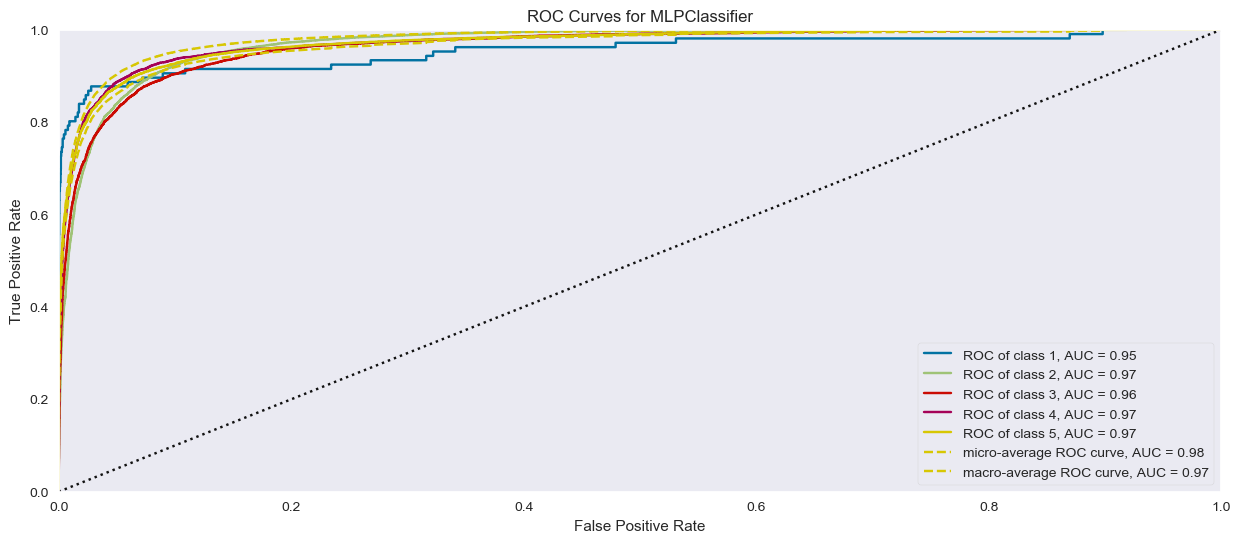

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=[1, 2, 3, 4, 5],
       estimator=MLPClassifier(early_stopping=True, hidden_layer_sizes=200,
                               learning_rate='adaptive', n_iter_no_change=20,
                               validation_fraction=0.3, verbose=True))

In [403]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
roc_auc(clf,X_train,y_train,X_test = X_test, y_test = y_test,classes=[1,2,3,4,5],ax=ax)

NameError: name 'fig' is not defined

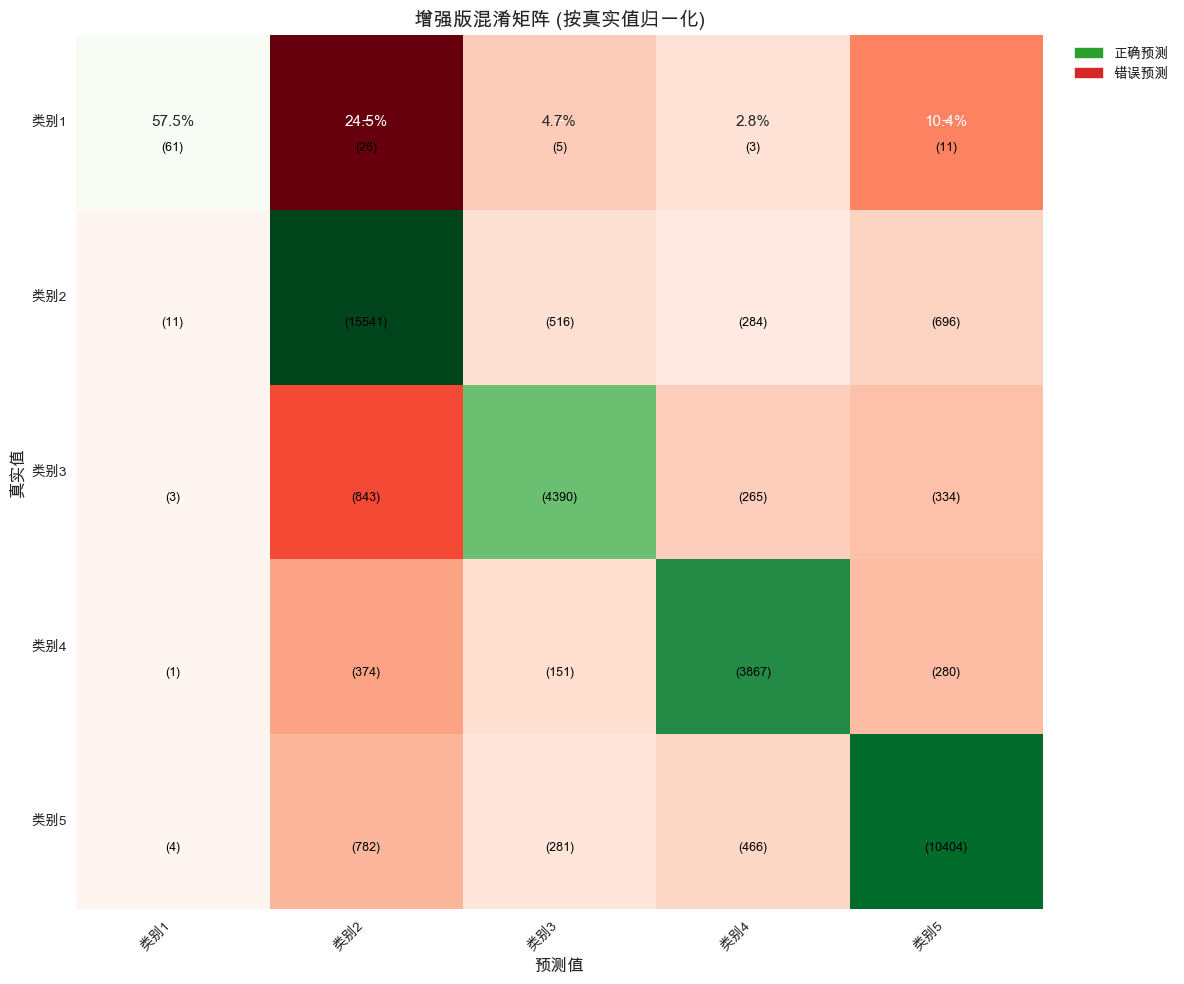

In [402]:

# 使用增强版
fig = plot_enhanced_confusion_matrix(y_test, y_pred_test, 
                                   class_names=['类别1', '类别2', '类别3', '类别4', '类别5'],
                                   style='detailed')
plt.show()

The Result for the MLP Classification is a Below

Recall Score: 86.656 %
Precision Score: 86.616 %
F1 Score:  0.866
Log Loss:  0.487
Classification Report:
               precision  recall  f1-score    support
1.0               0.755   0.698     0.725    106.000
2.0               0.889   0.910     0.899  17048.000
3.0               0.804   0.778     0.791   5835.000
4.0               0.812   0.817     0.815   4673.000
5.0               0.885   0.869     0.877  11937.000
accuracy          0.867   0.867     0.867      0.867
macro avg         0.829   0.814     0.822  39599.000
weighted avg      0.866   0.867     0.866  39599.000


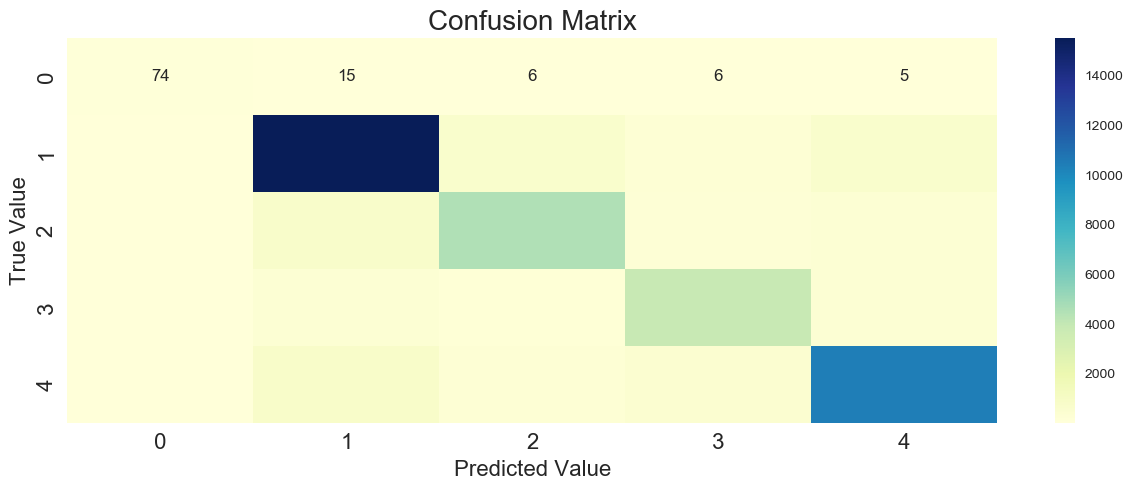

In [359]:
validate_result(y_test,clf.predict(X_test),clf.predict_proba(X_test),model="MLP")


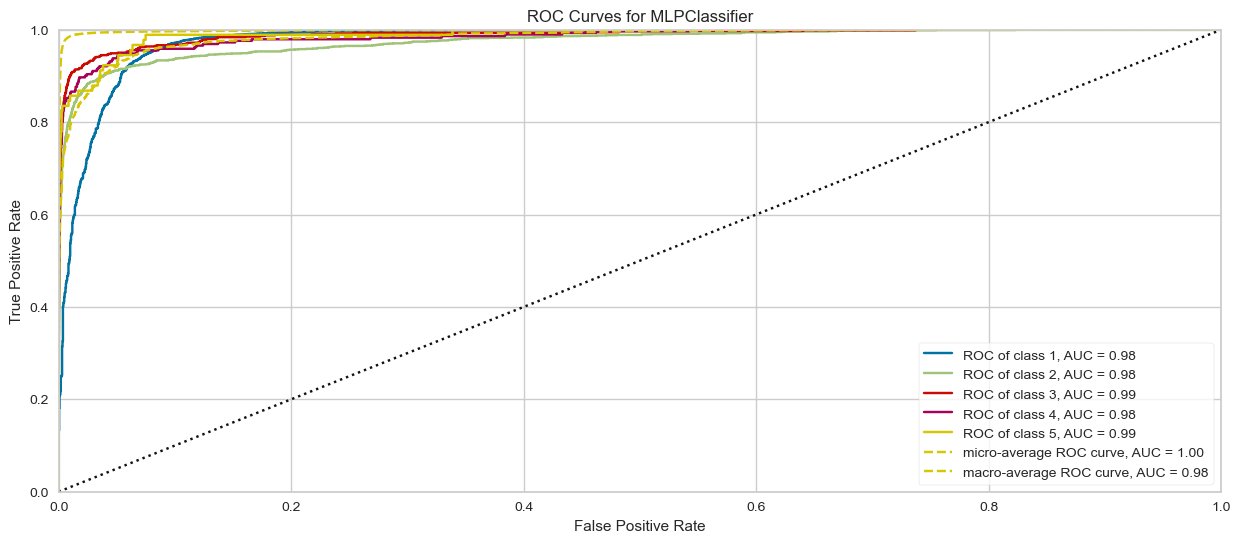

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=[1, 2, 3, 4, 5],
       estimator=MLPClassifier(early_stopping=True, hidden_layer_sizes=200,
                               learning_rate='adaptive', n_iter_no_change=20,
                               validation_fraction=0.3, verbose=True))

In [218]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
roc_auc(clf,X_train,y_train,X_test = X_test, y_test = y_test,classes=[1,2,3,4,5],ax=ax)

2025-09-28 03:30:05


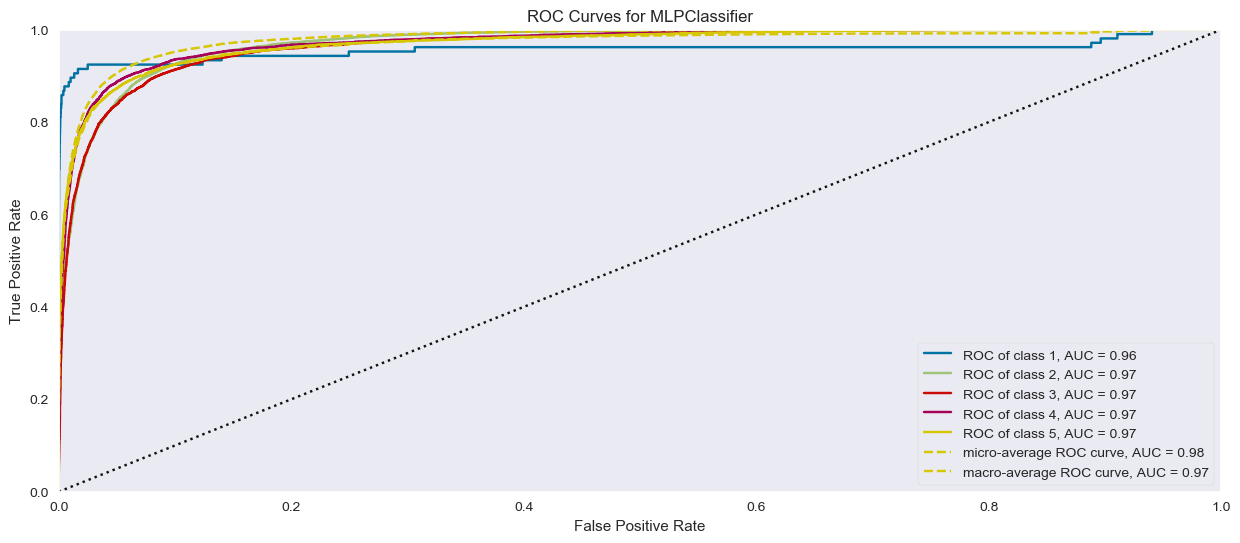

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=[1, 2, 3, 4, 5],
       estimator=MLPClassifier(early_stopping=True, hidden_layer_sizes=200,
                               learning_rate='adaptive', n_iter_no_change=20,
                               validation_fraction=0.3, verbose=True))

In [367]:
import time
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
roc_auc(clf,X_train,y_train,X_test = X_test, y_test = y_test,classes=[1,2,3,4,5],ax=ax)

# 多层感知神经网络
- Multi-layer Perceptron classifier.

In [368]:
clf = MLPClassifier(hidden_layer_sizes=400,learning_rate='adaptive',early_stopping=True,
                    validation_fraction=0.3,
                    n_iter_no_change=20,
                    verbose=True)
clf.fit(X_train,y_train)

Iteration 1, loss = 0.87405504
Validation score: 0.704579
Iteration 2, loss = 0.73735415
Validation score: 0.725681
Iteration 3, loss = 0.68052190
Validation score: 0.741708
Iteration 4, loss = 0.63288853
Validation score: 0.747834
Iteration 5, loss = 0.58910425
Validation score: 0.761819
Iteration 6, loss = 0.54940267
Validation score: 0.771535
Iteration 7, loss = 0.51489356
Validation score: 0.781498
Iteration 8, loss = 0.48135699
Validation score: 0.786881
Iteration 9, loss = 0.45191357
Validation score: 0.796163
Iteration 10, loss = 0.42348770
Validation score: 0.794988
Iteration 11, loss = 0.40292136
Validation score: 0.812871
Iteration 12, loss = 0.37749975
Validation score: 0.821163
Iteration 13, loss = 0.35747427
Validation score: 0.824072
Iteration 14, loss = 0.33984663
Validation score: 0.824691
Iteration 15, loss = 0.32515153
Validation score: 0.831993
Iteration 16, loss = 0.30951795
Validation score: 0.834406
Iteration 17, loss = 0.29669512
Validation score: 0.838676
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=400,
              learning_rate='adaptive', n_iter_no_change=20,
              validation_fraction=0.3, verbose=True)

The Result for the MLP Classification is a Below

Recall Score: 97.758 %
Precision Score: 97.651 %
F1 Score:  0.977
Log Loss:  0.106
Classification Report:
               precision  recall  f1-score    support
1.0               0.986   0.994     0.990  36876.000
2.0               0.871   0.750     0.806   1596.000
3.0               0.851   0.807     0.828    745.000
4.0               0.767   0.667     0.713    291.000
5.0               0.838   0.626     0.717     91.000
accuracy          0.978   0.978     0.978      0.978
macro avg         0.862   0.769     0.811  39599.000
weighted avg      0.977   0.978     0.977  39599.000


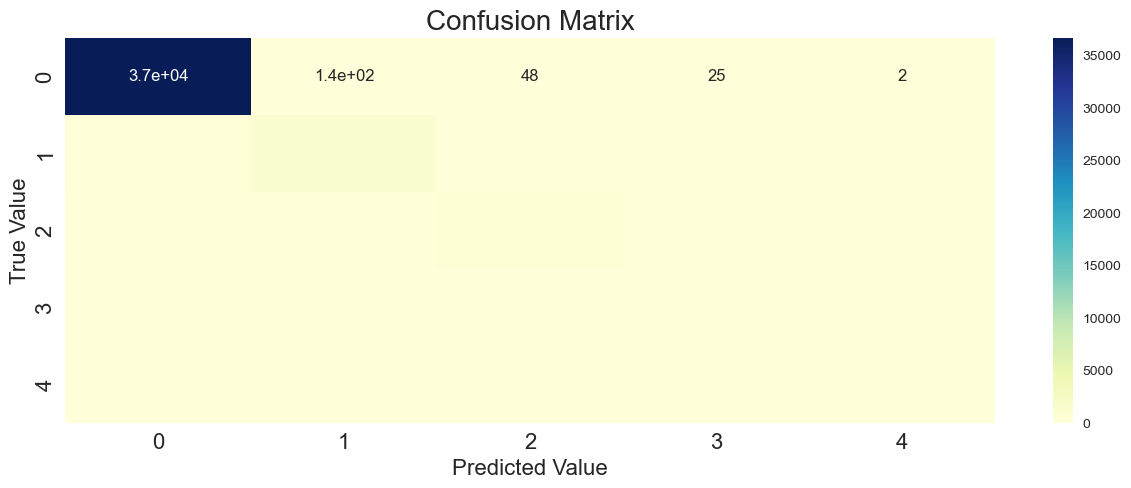

In [220]:
validate_result(y_test,clf.predict(X_test),clf.predict_proba(X_test),model="MLP")


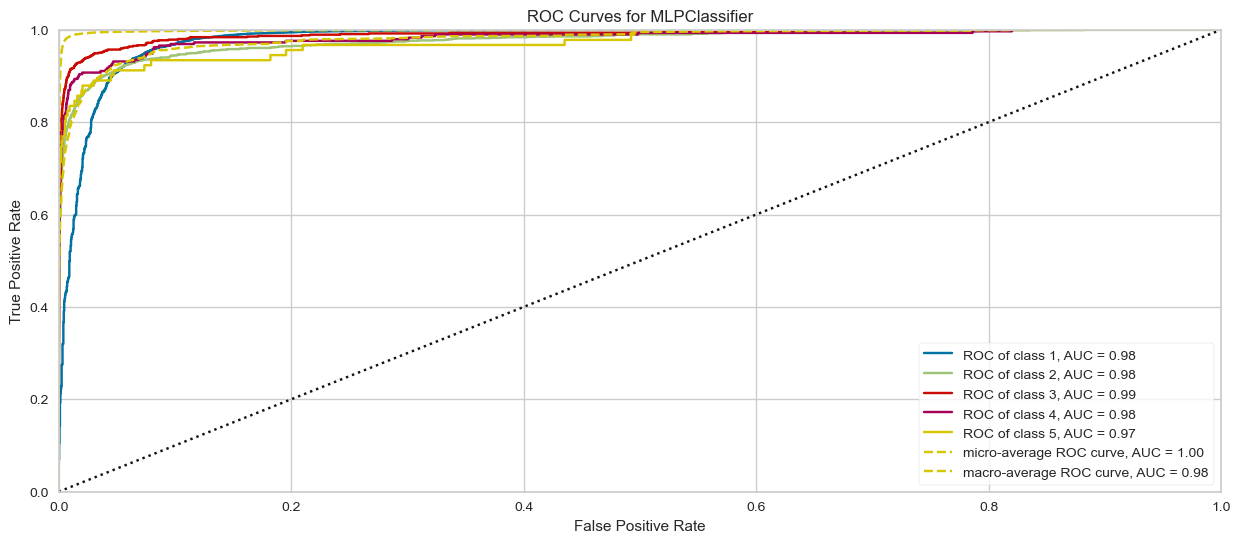

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=[1, 2, 3, 4, 5],
       estimator=MLPClassifier(early_stopping=True, hidden_layer_sizes=400,
                               learning_rate='adaptive', n_iter_no_change=20,
                               validation_fraction=0.3, verbose=True))

In [222]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
roc_auc(clf,X_train,y_train,X_test = X_test, y_test = y_test,classes=[1,2,3,4,5],ax=ax)

#Neural Network gives us the best results.¶

2025-09-28 03:33:05
The Result for the MLP Classification is a Below

Recall Score: 87.583 %
Precision Score: 87.562 %
F1 Score:  0.876
Log Loss:  0.431
Classification Report:
               precision  recall  f1-score    support
1.0               0.820   0.774     0.796    106.000
2.0               0.895   0.916     0.906  17048.000
3.0               0.807   0.805     0.806   5835.000
4.0               0.838   0.817     0.827   4673.000
5.0               0.896   0.877     0.887  11937.000
accuracy          0.876   0.876     0.876      0.876
macro avg         0.851   0.838     0.844  39599.000
weighted avg      0.876   0.876     0.876  39599.000


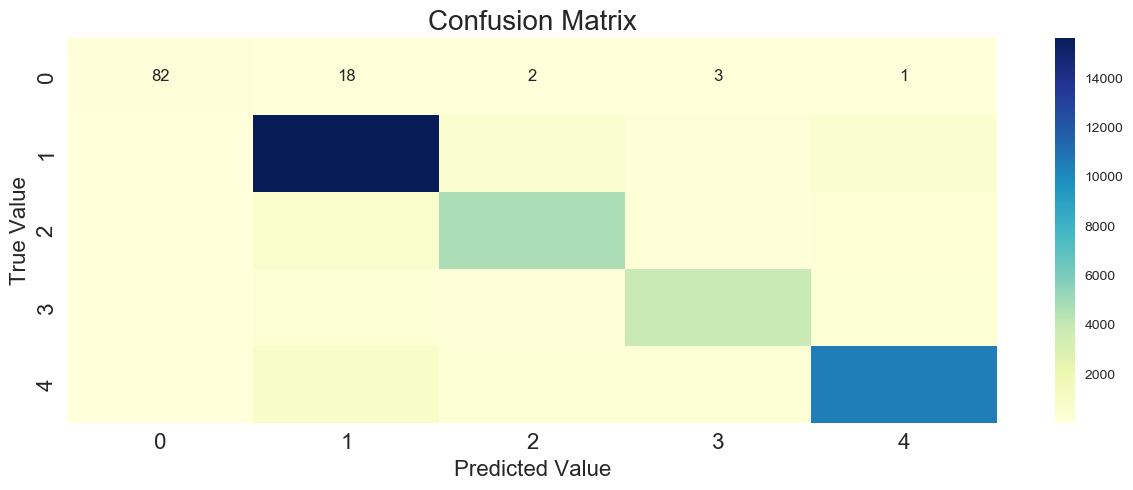

In [369]:
import time
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
validate_result(y_test,clf.predict(X_test),clf.predict_proba(X_test),model="MLP")


NameError: name 'fig' is not defined

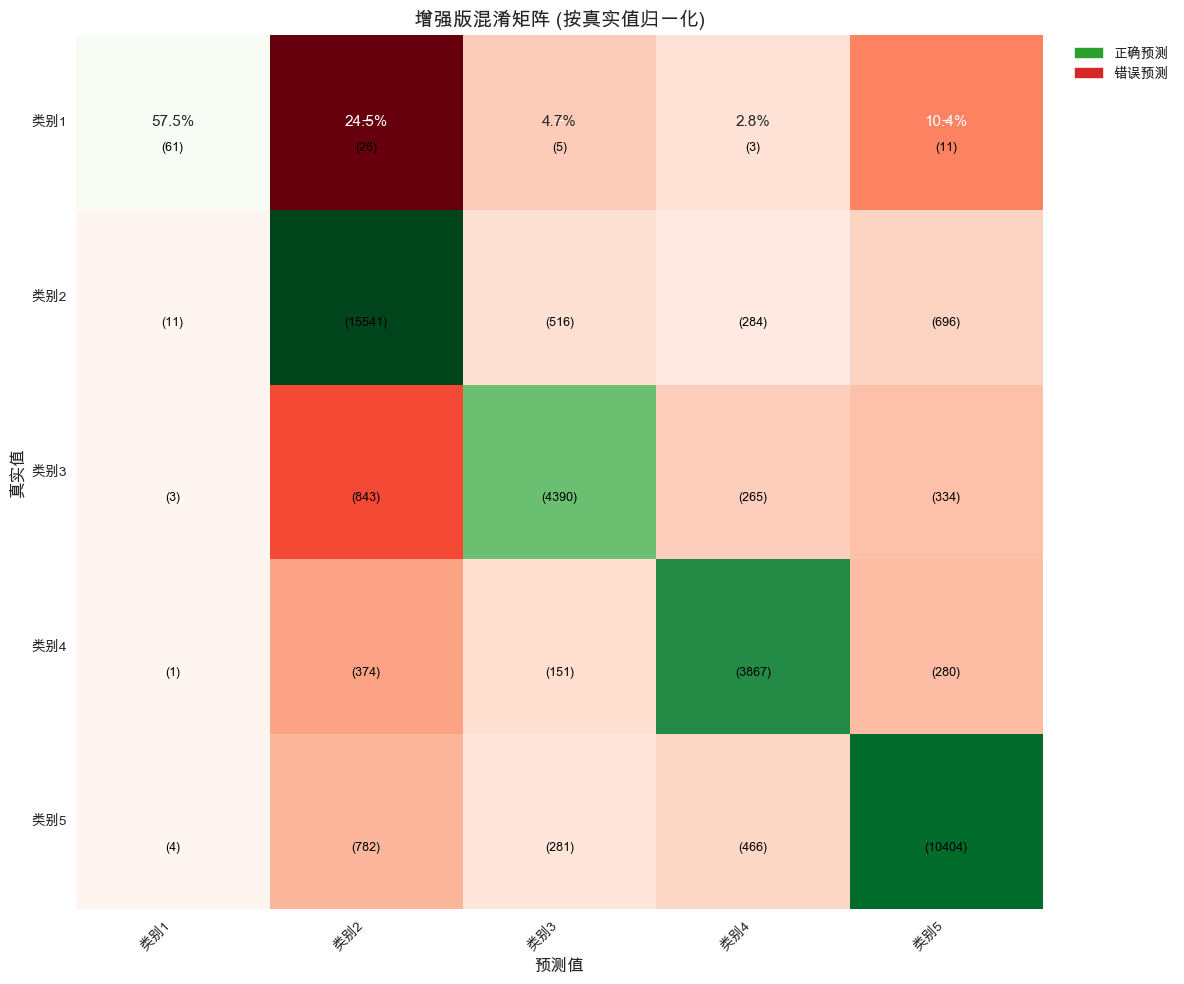

In [404]:

y_pred = clf.predict(X_test)
# 使用增强版
fig = plot_enhanced_confusion_matrix(y_test, y_pred, 
                                   class_names=['类别1', '类别2', '类别3','类别4','类别5'],
                                   style='detailed')
plt.show()

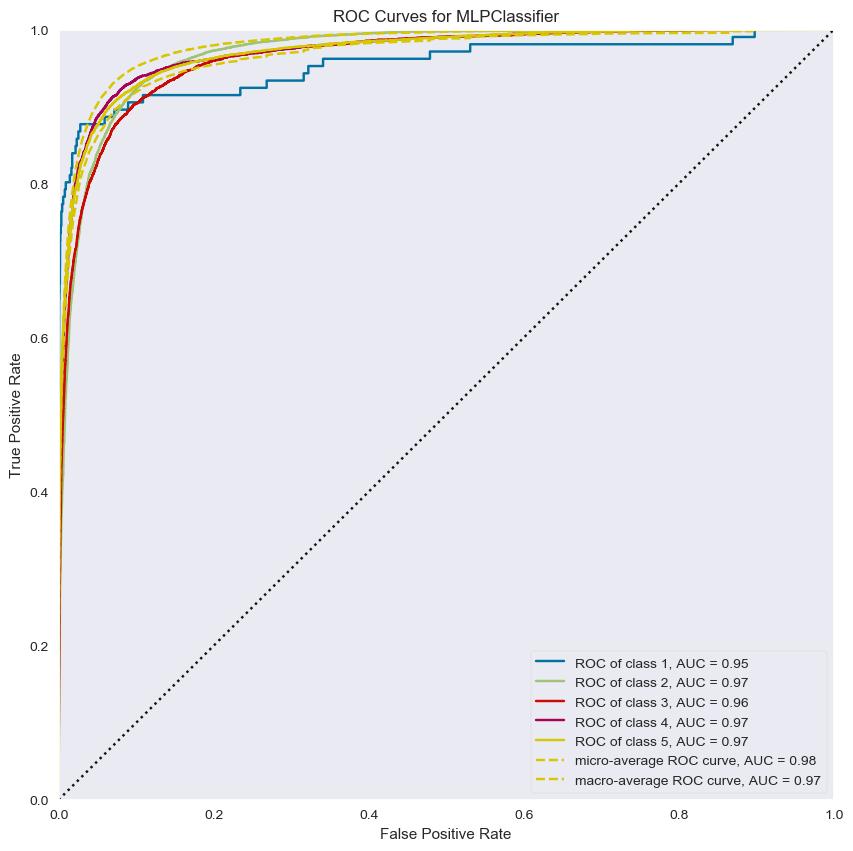

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=[1, 2, 3, 4, 5],
       estimator=MLPClassifier(early_stopping=True, hidden_layer_sizes=200,
                               learning_rate='adaptive', n_iter_no_change=20,
                               validation_fraction=0.3, verbose=True))

In [405]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
roc_auc(clf,X_train,y_train,X_test = X_test, y_test = y_test,classes=[1,2,3,4,5],ax=ax)